Importamos las librerías necesarias

In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

import re

In [514]:
df_bmw = pd.read_csv("./data/raw/bmw_pricing_v3.csv", sep=",")
df_bmw

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


# **PASO 1: EDA**

Primero, hacemos un Análisis Exploratorio de los datos para conocerlos antes de empezar a trabajar con ellos.

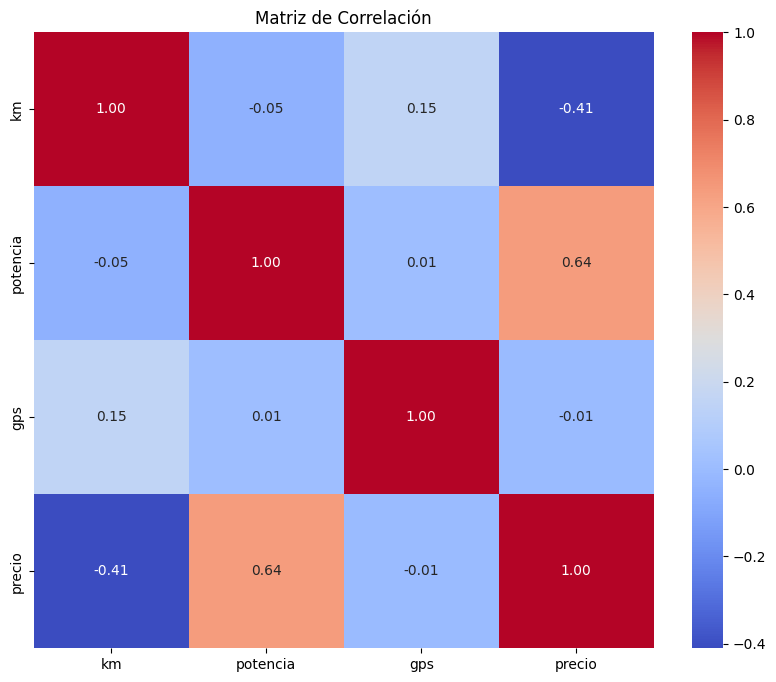

In [515]:
df_corr = df_bmw.select_dtypes(include=['number','boolean'])

correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [516]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [517]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [518]:
df_bmw.shape

(4843, 18)

# **PASO 2: LIMPIEZA**

## **2.1 Duplicados**

In [519]:
df_bmw.duplicated().sum()

0

No hay registros duplicados en el dataset

## **2.2 Nulos**

In [520]:
df_bmw.isnull().sum().sort_values(ascending=False)

asientos_traseros_plegables    3391
fecha_registro                 2423
tipo_coche                     1460
marca                           970
alerta_lim_velocidad            728
bluetooth                       728
aire_acondicionado              486
color                           445
precio                            6
tipo_gasolina                     5
volante_regulable                 4
modelo                            3
camara_trasera                    2
elevalunas_electrico              2
km                                2
potencia                          1
fecha_venta                       1
gps                               0
dtype: int64

In [521]:
df_bmw[df_bmw.isnull().all(axis=1)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


No hay ningun registro donde todos sus valores sean nulos.

### - Marca

In [522]:
df_bmw.marca.value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [523]:
df_bmw.marca.isna().sum()

970

Vemos que esta variable solo tiene un único valor (BMW) y además contiene 970 nulos. Consideramos eliminarla porque no aporta ningún valor al dataset ni al modelo futuro.

In [524]:
# Eliminamos columna marca
df_bmw.drop(columns="marca", inplace=True)

### - Modelo

In [525]:
df_bmw.modelo.isna().sum()

3

La variable Modelo tiene 3 valores nulos... Valoramos si transformarlos en "Desconocido" o directamente borrar estos registros.

In [526]:
df_bmw[df_bmw["modelo"].isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,NaN,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01


Por ahora, inferimos en ellos:

In [527]:
df_bmw["modelo"] = df_bmw["modelo"].fillna("Desconocido")

In [528]:
df_bmw.modelo.value_counts().head(20)

modelo
320                 752
520                 633
318                 568
X3                  438
116                 358
X1                  274
316                 235
X5                  231
525                 184
530                 157
118                 143
318 Gran Turismo     97
320 Gran Turismo     73
518                  66
535                  46
X4                   46
X6                   44
420                  44
120                  36
730                  33
Name: count, dtype: int64

### - km

In [529]:
df_bmw.km.isna().sum()

2

<Axes: >

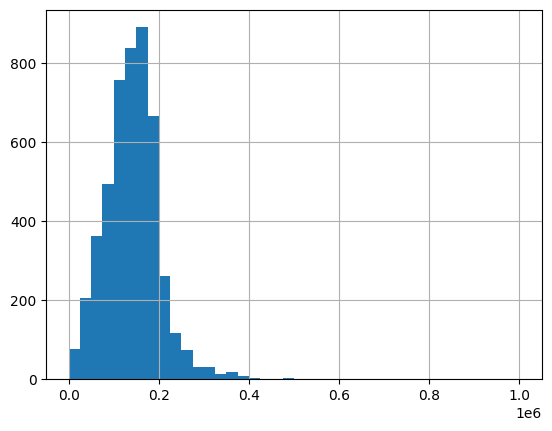

In [530]:
df_bmw.km.hist(bins=40)

In [531]:
df_bmw.km.mean()

140959.347862012

In [532]:
df_bmw.km.median()

141080.0

Como solo tenemos dos registros con km a null, los inferimos con la media o la mediana. En este caso da igual cual coger porque son muy similares (en torno a 141km):

In [533]:
df_bmw["km"] = df_bmw["km"].fillna(df_bmw["km"].mean())

### - Potencia

In [534]:
df_bmw.potencia.isna().sum()

1

<Axes: >

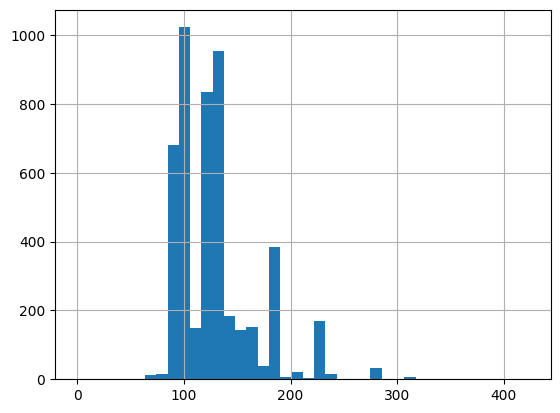

In [535]:
df_bmw.potencia.hist(bins=40)

In [536]:
df_bmw.potencia.mean()

128.98182569186287

In [537]:
df_bmw.potencia.median()

120.0

Al ser un único registro nulo, lo inferimos con la media:

In [538]:
df_bmw["potencia"] = df_bmw["potencia"].fillna(df_bmw["potencia"].mean())

### - fecha_registro y fecha_venta

In [539]:
df_bmw.fecha_registro.isna().sum()

2423

In [540]:
df_bmw.fecha_registro.isna().mean() * 100

50.03097253768325

In [541]:
df_bmw[df_bmw.fecha_venta.isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
594,525,269290.0,120.0,NaN,diesel,silver,NaN,True,False,True,NaN,False,False,True,True,4200.0,NaN


Eliminamos el registro con fecha_venta nula, ya que tiene 4 variables nulas

In [542]:
df_bmw = df_bmw[df_bmw["fecha_venta"].notna()]
df_bmw[df_bmw.fecha_venta.isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [543]:
df_bmw.fecha_venta.value_counts()

fecha_venta
2018-05-01    809
2018-03-01    738
2018-04-01    691
2018-06-01    603
2018-07-01    537
2018-08-01    527
2018-02-01    502
2018-09-01    223
2018-01-01    208
2007-08-01      1
2010-04-01      1
2009-04-01      1
2008-06-01      1
Name: count, dtype: int64

In [544]:
df_bmw[["fecha_registro", "fecha_venta"]]

,fecha_registro,fecha_venta
0,2012-02-01,2018-01-01
1,NaN,2018-02-01
2,2012-04-01,2018-02-01
3,NaN,2018-02-01
4,NaN,2018-04-01
...,...,...
4838,NaN,2018-08-01
4839,2015-06-01,2018-08-01
4840,2015-10-01,2018-09-01
4841,2016-04-01,2018-09-01


In [545]:
df_bmw.fecha_registro.value_counts()

fecha_registro
2013-07-01    93
2014-03-01    83
2014-05-01    81
2013-01-01    78
2013-10-01    77
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: count, Length: 180, dtype: int64

Los valores nulos de fecha_registro los vamos a inferir con la moda de cada modelo. Los valores de los modelos que no tengan ningún valor no-nulo, los inferiremos con la moda general

In [546]:
df2 = df_bmw.copy()
df2["fecha_registro"].dropna(inplace=True)
df2['fecha_registro'] = pd.to_datetime(df2['fecha_registro'], errors='coerce')

# Agrupamos por modelo y calculamos la moda
model_registration_mode = df2.groupby("modelo")["fecha_registro"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
print(model_registration_mode)

modelo
 Active Tourer   2014-10-01
114              2013-01-01
116              2012-10-01
118              2015-10-01
120              2009-01-01
                    ...    
X6               2010-04-01
X6 M             2014-04-01
Z4               2005-05-01
i3               2014-01-01
i8                      NaT
Name: fecha_registro, Length: 77, dtype: datetime64[ns]


In [547]:
# Inferimos los valores nulos del dataframe original con la moda por modelo
df_bmw['fecha_registro'] = df_bmw.apply(
    lambda row: model_registration_mode[row['modelo']] if pd.isna(row['fecha_registro']) else row['fecha_registro'],
    axis=1
)

# Comprobamos el número de valores nulos
print(df_bmw['fecha_registro'].isna().sum())

18


/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/3118116699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['fecha_registro'] = df_bmw.apply(


In [548]:
# Completamos los nulos con la moda general
df_bmw["fecha_registro"] = df_bmw["fecha_registro"].fillna(df_bmw["fecha_registro"].mode()[0])
print(df_bmw['fecha_registro'].isna().sum())

0


/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/36660305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["fecha_registro"] = df_bmw["fecha_registro"].fillna(df_bmw["fecha_registro"].mode()[0])


### - tipo_gasolina

In [549]:
df_bmw.tipo_gasolina.isna().sum()

5

In [550]:
df_bmw.tipo_gasolina.value_counts()

tipo_gasolina
diesel           4630
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [551]:
df_bmw["tipo_gasolina"].value_counts(normalize=True) * 100

tipo_gasolina
diesel           95.720488
petrol            3.948729
hybrid_petrol     0.165392
Diesel            0.103370
electro           0.062022
Name: proportion, dtype: float64

Como el 95% de la base es diesel, los 5 registros con tipo_gasolina nulo los inferimos con el valor de la mayoría.

In [552]:
df_bmw["tipo_gasolina"] = df_bmw["tipo_gasolina"].fillna('diesel')

/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/92745975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["tipo_gasolina"] = df_bmw["tipo_gasolina"].fillna('diesel')


In [553]:
# Convertir a minúsculas
df_bmw['tipo_gasolina'] = df_bmw['tipo_gasolina'].str.lower()

# Comprobamos
df_bmw['tipo_gasolina'].value_counts(normalize=True) * 100


/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/1272797972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['tipo_gasolina'] = df_bmw['tipo_gasolina'].str.lower()


tipo_gasolina
diesel           95.828170
petrol            3.944651
hybrid_petrol     0.165221
electro           0.061958
Name: proportion, dtype: float64

### - color

In [554]:
df_bmw.color.isna().sum()

445

In [555]:
df_bmw.color.value_counts()

color
black     1499
grey      1070
blue       647
white      484
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

In [556]:
df_bmw.color.value_counts(normalize=True) * 100

color
black     34.091426
grey      24.334774
blue      14.714578
white     11.007505
brown      6.868319
silver     6.618149
red        1.068911
beige      0.841483
green      0.318399
orange     0.136457
Name: proportion, dtype: float64

In [557]:
df_bmw["color"] = df_bmw["color"].fillna('desconocido')

/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/3003192550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["color"] = df_bmw["color"].fillna('desconocido')


Que el 34% de los coches sean color black no tiene el peso suficiente como para inferir a los 445 registros con color a null. Por tanto, decidimos inferirlos con el valor "desconocido"

### - tipo_coche

In [558]:
df_bmw.tipo_coche.isna().sum()

1459

In [559]:
df_bmw.tipo_coche.isna().mean() * 100

30.13217678645188

Desconocemos el tipo de coche de 1.460 registros, es decir, un 30% de la base.

In [560]:
df_bmw.tipo_coche.value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [561]:
df_bmw.tipo_coche.value_counts(normalize=True) * 100

tipo_coche
estate         32.722436
sedan          24.268401
suv            22.317470
hatchback      14.425067
subcompact      2.276086
coupe           2.246527
convertible     0.886787
van             0.857227
Name: proportion, dtype: float64

Vamos a explorar como se distribuyen los valores de tipo_coche con respecto a la variable con la que más correla que es asientos_traseros_plegables:

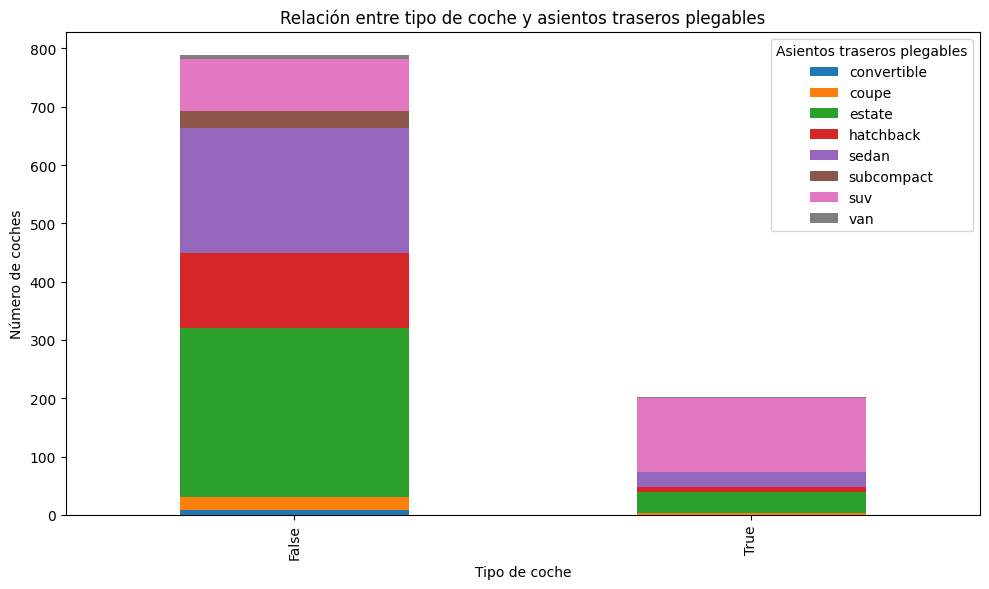

In [562]:
# Tabla de frecuencia
ct = pd.crosstab(df_bmw["asientos_traseros_plegables"], df_bmw["tipo_coche"])

# Plot
ct.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Relación entre tipo de coche y asientos traseros plegables")
plt.xlabel("Tipo de coche")
plt.ylabel("Número de coches")
plt.legend(title="Asientos traseros plegables")
plt.tight_layout()
plt.show()

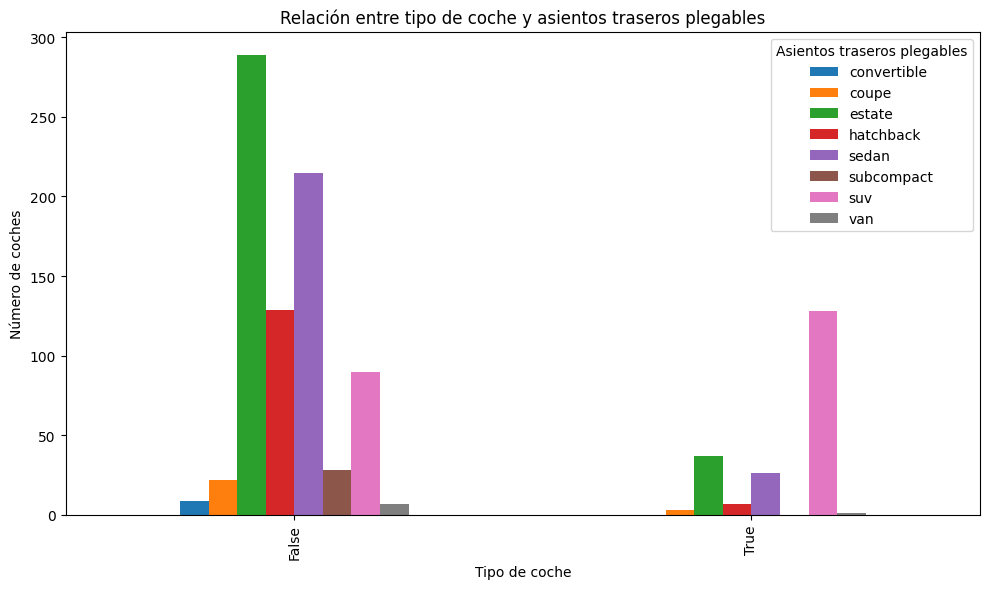

In [563]:
ct.plot(kind="bar", stacked=False, figsize=(10,6))
plt.title("Relación entre tipo de coche y asientos traseros plegables")
plt.xlabel("Tipo de coche")
plt.ylabel("Número de coches")
plt.legend(title="Asientos traseros plegables")
plt.tight_layout()
plt.show()

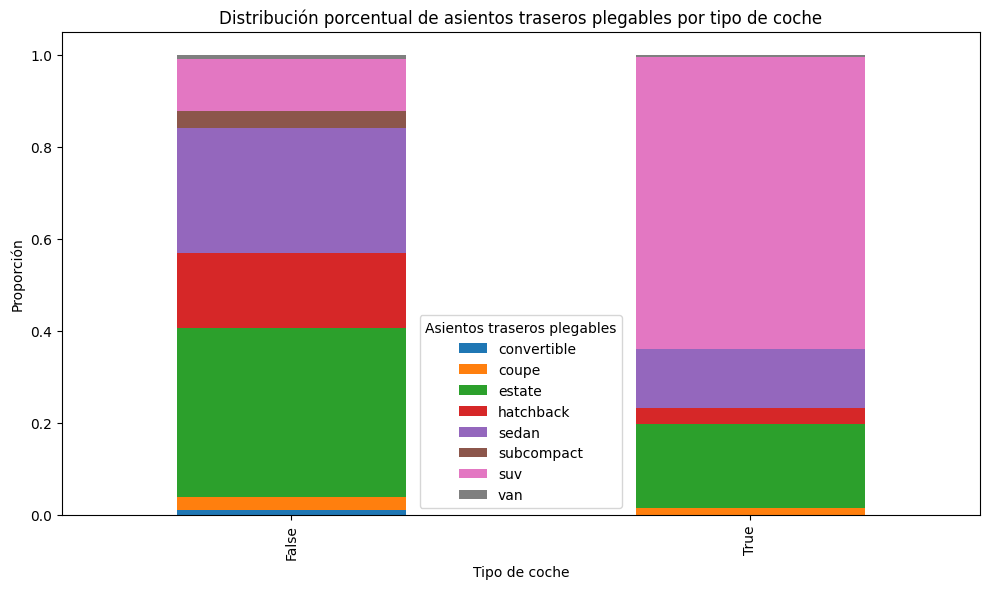

In [564]:
ct_norm = ct.div(ct.sum(axis=1), axis=0)

ct_norm.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Distribución porcentual de asientos traseros plegables por tipo de coche")
plt.xlabel("Tipo de coche")
plt.ylabel("Proporción")
plt.legend(title="Asientos traseros plegables")
plt.tight_layout()
plt.show()

In [565]:
df_bmw[df_bmw.tipo_coche.isna()]["asientos_traseros_plegables"].value_counts()

asientos_traseros_plegables
False    361
True     100
Name: count, dtype: int64

Se ve que más de un 60% de los coches con asientos plegables son de tipo "suv". A pesar de esto, no veo nada más interesente que me haga inferir en los valores nulos de tipo_coche a partir de la variable asientos_traseros_plegables.

Por tanto, hacemos lo mismo que para la anterior variable, que el 32% de la base sea de tipo "estate" no es de peso suficiente como para inferir en los nulos, que en este caso predominan incluso más que la clase dominante. Decidimos inferir los nulos con "desconocido"

In [566]:
df_bmw["tipo_coche"] = df_bmw["tipo_coche"].fillna('desconocido')

/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/1211342498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["tipo_coche"] = df_bmw["tipo_coche"].fillna('desconocido')


### - volante_regulable

In [567]:
df_bmw.volante_regulable.isna().sum()

4

In [568]:
df_bmw.volante_regulable.value_counts()

volante_regulable
True     2661
False    2177
Name: count, dtype: int64

Como son solo 4 registro a null y no predomina una categoría más frente a la otra, decidimos inferir en los valores nulos con el valor más repetido, por ejemplo.

In [569]:
df_bmw["volante_regulable"].mode()

0    True
Name: volante_regulable, dtype: object

In [570]:
df_bmw["volante_regulable"] = df_bmw["volante_regulable"].fillna(df_bmw["volante_regulable"].mode()[0])

/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/1982800180.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["volante_regulable"] = df_bmw["volante_regulable"].fillna(df_bmw["volante_regulable"].mode()[0])
/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/1982800180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["volante_regulable"] = df_bmw["volante_regulable"].fillna(df_bmw["volante_regulable"].mode()[0])


In [571]:
df_bmw.volante_regulable.value_counts()

volante_regulable
True     2665
False    2177
Name: count, dtype: int64

### - aire_acondicionado

In [572]:

df_bmw.aire_acondicionado.isna().sum()

486

In [573]:
df_bmw.aire_acondicionado.isna().mean() * 100

10.037174721189592

Un 10% de la base no tiene información sobre aire acondicionado

In [574]:
df_bmw.aire_acondicionado.dtype

dtype('O')

In [575]:
df_bmw.aire_acondicionado.value_counts()

aire_acondicionado
True     3465
False     891
Name: count, dtype: int64

In [576]:
df_bmw.aire_acondicionado.value_counts(normalize=True) * 100

aire_acondicionado
True     79.545455
False    20.454545
Name: proportion, dtype: float64

Un 80% de la base de coches tiene aire acondicionado... por tanto podemos asumir que el 10% que no tiene información tambien tendrá aire acondicionado sabiendo que podemos fallar en un 20% de los casos.

In [577]:
df_bmw["aire_acondicionado"] = df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0])

/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/3733805682.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["aire_acondicionado"] = df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0])
/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/3733805682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["aire_acondicionado"] = df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0])


In [578]:
df_bmw.aire_acondicionado.dtype

dtype('bool')

### - camara_trasera

In [579]:
df_bmw.camara_trasera.isna().sum()

2

In [580]:
df_bmw.camara_trasera.value_counts()

camara_trasera
False    3864
True      976
Name: count, dtype: int64

In [581]:
df_bmw.camara_trasera.value_counts(normalize=True) * 100

camara_trasera
False    79.834711
True     20.165289
Name: proportion, dtype: float64

Aquí pasa lo mismo, inferimos los 2 valores nulos con el valor más repetido.



In [582]:
df_bmw["camara_trasera"] = df_bmw["camara_trasera"].fillna(df_bmw["camara_trasera"].mode()[0])

/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/4145998243.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["camara_trasera"] = df_bmw["camara_trasera"].fillna(df_bmw["camara_trasera"].mode()[0])
/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/4145998243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["camara_trasera"] = df_bmw["camara_trasera"].fillna(df_bmw["camara_trasera"].mode()[0])


### - asientos_traseros_plegables

In [583]:
df_bmw.asientos_traseros_plegables.isna().sum()

3390

In [584]:
df_bmw.asientos_traseros_plegables.isna().mean() * 100

70.01239157372986

In [585]:
df_bmw.asientos_traseros_plegables.value_counts()

asientos_traseros_plegables
False    1150
True      302
Name: count, dtype: int64

Considero que como tenemos un 70% de los registros sin información de asientos traseros plegables, no es un campo muy relevante y no merece la pena inferirlo. Solución: lo eliminamos.

In [586]:
df_bmw.drop(columns="asientos_traseros_plegables", inplace=True)

/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/3527506566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw.drop(columns="asientos_traseros_plegables", inplace=True)


### - elevalunas_electrico

In [587]:
df_bmw.elevalunas_electrico.isna().sum()

2

In [588]:
df_bmw.elevalunas_electrico.value_counts()

elevalunas_electrico
False    2611
True     2229
Name: count, dtype: int64

Inferirmos los valores nulos de este campo de igual manera que volante_regulable: Como son solo 2 registros a null y no predomina una categoría más frente a la otra, decidimos inferir en los valores nulos con el valor más repetido.

In [589]:
df_bmw["elevalunas_electrico"] = df_bmw["elevalunas_electrico"].fillna(df_bmw["elevalunas_electrico"].mode()[0])

/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/3830710364.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["elevalunas_electrico"] = df_bmw["elevalunas_electrico"].fillna(df_bmw["elevalunas_electrico"].mode()[0])
/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/3830710364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["elevalunas_electrico"] = df_bmw["elevalunas_electrico"].fillna(df_bmw["elevalunas_electrico"].mode()[0])


### - bluetooth

In [590]:
df_bmw.bluetooth.isna().sum()

728

In [591]:
df_bmw.bluetooth.isna().mean() * 100

15.03510945890128

Un 15% de la base no tiene información sobre bluetooth (728).

In [592]:
df_bmw.bluetooth.value_counts()

bluetooth
False    3118
True      996
Name: count, dtype: int64

In [593]:
df_bmw.bluetooth.value_counts(normalize=True) * 100

bluetooth
False    75.789985
True     24.210015
Name: proportion, dtype: float64

Aquí pasa igual que con aire_acondicionado. Un 76% de la base de coches NO tiene bluetooth... por tanto podemos asumir que el 15% que no tiene información tampoco tendrá bluetooth sabiendo que podemos fallar en un 25% de los casos.

In [594]:
df_bmw["bluetooth"] = df_bmw["bluetooth"].fillna(df_bmw["bluetooth"].mode()[0])

/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/4213889263.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["bluetooth"] = df_bmw["bluetooth"].fillna(df_bmw["bluetooth"].mode()[0])
/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/4213889263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["bluetooth"] = df_bmw["bluetooth"].fillna(df_bmw["bluetooth"].mode()[0])


### - gps

In [595]:
df_bmw.gps.isna().sum()

0

No tiene nulos!

In [596]:
df_bmw.gps.value_counts()

gps
True     4513
False     329
Name: count, dtype: int64

In [597]:
df_bmw.gps.value_counts(normalize=True) * 100

gps
True     93.205287
False     6.794713
Name: proportion, dtype: float64

In [598]:
df_bmw.groupby("gps")["precio"].mean()

gps
False    16010.334347
True     15821.477701
Name: precio, dtype: float64

A pesar de que no haya demasiada diferencia de precio medio en función de si un coche tiene gps o no, de momento, la mantenemos.

### - alerta_lim_velocidad

In [599]:
df_bmw.alerta_lim_velocidad.isna().sum()

728

In [600]:
df_bmw.alerta_lim_velocidad.isna().mean() * 100

15.03510945890128

In [601]:
df_bmw.alerta_lim_velocidad.value_counts()

alerta_lim_velocidad
True     2239
False    1875
Name: count, dtype: int64

In [602]:
df_bmw.alerta_lim_velocidad.value_counts(normalize=True) * 100

alerta_lim_velocidad
True     54.423918
False    45.576082
Name: proportion, dtype: float64

Aquí no vamos a inferir con la moda porque ninguna categoría es predominante... Inferimos los 728 registros con alerta_lim_velocidad a null con "desconocido"

In [603]:
df_bmw["alerta_lim_velocidad"] = df_bmw["alerta_lim_velocidad"].fillna('desconocido')

/var/folders/36/m07hd80d0cq09shsjpwrlm9m0000gn/T/ipykernel_19595/3454295026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["alerta_lim_velocidad"] = df_bmw["alerta_lim_velocidad"].fillna('desconocido')


### - precio

In [604]:
df_bmw.precio.isna().sum()

6

Esta es la variable target y tiene 6 valores a null. Vamos a inspeccionarlos a ver si son relevantes, si no, los eliminamos.

In [605]:
df_bmw[df_bmw.precio.isna()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,420,174740.0,135.0,2013-11-01,diesel,desconocido,coupe,True,True,True,True,True,True,True,NaN,2018-05-01
524,520,163803.0,135.0,2013-07-01 00:00:00,diesel,grey,estate,False,True,True,False,False,True,False,NaN,2018-02-01
539,316,34489.0,85.0,2013-05-01 00:00:00,diesel,black,estate,True,False,False,False,False,True,False,NaN,2018-02-01
549,318,157129.0,100.0,2013-01-01 00:00:00,diesel,blue,estate,True,True,True,True,False,True,True,NaN,2018-03-01
569,320,166866.0,120.0,2012-10-01 00:00:00,diesel,blue,desconocido,True,True,False,True,True,True,True,NaN,2018-03-01
584,320,114771.0,135.0,2012-10-01 00:00:00,diesel,blue,desconocido,False,True,False,False,False,True,False,NaN,2018-03-01


No destacan por nada así que eliminamos estos registros.

In [606]:
df_bmw = df_bmw[df_bmw.precio.notna()]

In [607]:
df_bmw.precio.isna().sum()

0

# **PASO 3: PREPROCESAMIENTO**

## Campos de fechas

In [608]:
df_bmw2 = df_bmw.copy()
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4836 non-null   object 
 1   km                    4836 non-null   float64
 2   potencia              4836 non-null   float64
 3   fecha_registro        4836 non-null   object 
 4   tipo_gasolina         4836 non-null   object 
 5   color                 4836 non-null   object 
 6   tipo_coche            4836 non-null   object 
 7   volante_regulable     4836 non-null   bool   
 8   aire_acondicionado    4836 non-null   bool   
 9   camara_trasera        4836 non-null   bool   
 10  elevalunas_electrico  4836 non-null   bool   
 11  bluetooth             4836 non-null   bool   
 12  gps                   4836 non-null   bool   
 13  alerta_lim_velocidad  4836 non-null   object 
 14  precio                4836 non-null   float64
 15  fecha_venta           4836

Como solo hay 4 registros cuya fecha_venta sea inferior a 2018 y 2 de ellas son erróneas porque fecha_venta < fecha_registro, vamos a inferir en el valor de fecha_venta para estos registros con la moda.

In [609]:
df_bmw2["fecha_venta"] = np.where(
    pd.to_datetime(df_bmw2["fecha_venta"]) < pd.to_datetime("2018-01-01"),
    df_bmw2["fecha_venta"].mode()[0],
    df_bmw2["fecha_venta"]
)
df_bmw2.fecha_venta.value_counts()

fecha_venta
2018-05-01    812
2018-03-01    735
2018-04-01    691
2018-06-01    603
2018-07-01    537
2018-08-01    527
2018-02-01    500
2018-09-01    223
2018-01-01    208
Name: count, dtype: int64

In [610]:
df_bmw2["fecha_registro"] = pd.to_datetime(df_bmw2["fecha_registro"], errors='coerce')
df_bmw2[df_bmw2["fecha_registro"]<"2001-01-01"]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
25,318,196092.0,85.0,1995-10-01,petrol,desconocido,convertible,True,False,False,False,False,False,False,1800.0,2018-05-01
676,523,175642.0,150.0,2000-03-01,petrol,grey,estate,True,True,False,True,False,True,desconocido,14300.0,2018-03-01
1158,523,174944.0,150.0,2000-03-01,petrol,grey,estate,True,True,False,True,False,True,True,11600.0,2018-05-01
1688,523,359648.0,120.0,2000-03-01,petrol,green,desconocido,True,False,False,False,False,True,True,800.0,2018-08-01
2473,525,230578.0,85.0,1997-07-01,diesel,desconocido,sedan,False,True,False,False,False,True,desconocido,200.0,2018-08-01
2574,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,True,False,False,False,True,False,200.0,2018-08-01
2591,316,178231.0,77.0,1999-11-01,petrol,green,sedan,False,False,False,False,True,True,False,700.0,2018-02-01
2611,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,True,False,200.0,2018-08-01
2771,316,146951.0,66.0,1990-03-01,petrol,white,sedan,False,False,False,False,False,False,False,1300.0,2018-04-01
3062,318,98097.0,85.0,1994-01-01,petrol,blue,sedan,True,False,False,False,False,True,True,400.0,2018-04-01


In [611]:
df_bmw2.fecha_venta.value_counts()

fecha_venta
2018-05-01    812
2018-03-01    735
2018-04-01    691
2018-06-01    603
2018-07-01    537
2018-08-01    527
2018-02-01    500
2018-09-01    223
2018-01-01    208
Name: count, dtype: int64

In [612]:
df_bmw2["fecha_venta"] = pd.to_datetime(df_bmw2["fecha_venta"], errors='coerce')
df_bmw2[df_bmw2["fecha_venta"]<'2018-01-01']

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [613]:
df_bmw2["fecha_venta"] = np.where(df_bmw2["fecha_venta"] < "2018-01-01", df_bmw2["fecha_venta"].mode()[0], df_bmw2["fecha_venta"])
df_bmw2["fecha_venta"] = pd.to_datetime(df_bmw2["fecha_venta"], errors='coerce')

In [614]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4836 non-null   object        
 1   km                    4836 non-null   float64       
 2   potencia              4836 non-null   float64       
 3   fecha_registro        4836 non-null   datetime64[ns]
 4   tipo_gasolina         4836 non-null   object        
 5   color                 4836 non-null   object        
 6   tipo_coche            4836 non-null   object        
 7   volante_regulable     4836 non-null   bool          
 8   aire_acondicionado    4836 non-null   bool          
 9   camara_trasera        4836 non-null   bool          
 10  elevalunas_electrico  4836 non-null   bool          
 11  bluetooth             4836 non-null   bool          
 12  gps                   4836 non-null   bool          
 13  alerta_lim_velocidad  4

In [615]:
df_bmw2[df_bmw2["fecha_registro"] > df_bmw2["fecha_venta"]]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [616]:
df_fechas = df_bmw2[df_bmw2['fecha_registro'].notna() & df_bmw2['fecha_venta'].notna()].copy()

# Calculamos la diferencia en años desde el registro del coche hasta su venta
df_fechas['años_registro_venta'] = (
    round((df_fechas['fecha_venta'] - df_fechas['fecha_registro']).dt.days / 365,0)
)

print(df_fechas['años_registro_venta'].describe())

count    4836.000000
mean        5.191687
std         1.969536
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        28.000000
Name: años_registro_venta, dtype: float64


<Axes: >

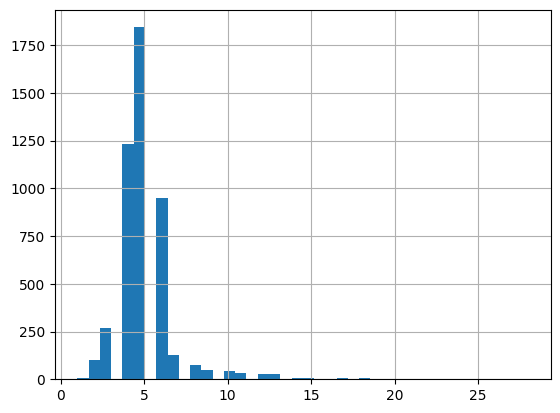

In [617]:
df_fechas['años_registro_venta'].hist(bins=40)

In [618]:
df_fechas['años_registro_venta'].mean()

5.191687344913151

In [619]:
df_fechas['años_registro_venta'].median()

5.0

In [620]:
df_bmw2['años_registro_venta'] = df_fechas['años_registro_venta']

In [621]:
print(df_fechas['años_registro_venta'].describe())

count    4836.000000
mean        5.191687
std         1.969536
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        28.000000
Name: años_registro_venta, dtype: float64


In [622]:
print(df_bmw2['años_registro_venta'].describe())

count    4836.000000
mean        5.191687
std         1.969536
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        28.000000
Name: años_registro_venta, dtype: float64


Ahora, solo tenemos un año de ventas, repartidas por meses. Desconocemos el día porque siempre aparece el día uno entonces lo realmente importante de este campo es el mes de venta.

In [623]:
df_bmw2['fecha_venta' + '_month'] = df_bmw2['fecha_venta'].dt.month
df_bmw2['venta_trimestre'] = df_bmw2['fecha_venta'].dt.quarter.map({
    1: 'venta_primer_trimestre',
    2: 'venta_segundo_trimestre',
    3: 'venta_tercer_trimestre',
    4: 'venta_cuarto_trimestre'
})

In [624]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 0 to 4842
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4836 non-null   object        
 1   km                    4836 non-null   float64       
 2   potencia              4836 non-null   float64       
 3   fecha_registro        4836 non-null   datetime64[ns]
 4   tipo_gasolina         4836 non-null   object        
 5   color                 4836 non-null   object        
 6   tipo_coche            4836 non-null   object        
 7   volante_regulable     4836 non-null   bool          
 8   aire_acondicionado    4836 non-null   bool          
 9   camara_trasera        4836 non-null   bool          
 10  elevalunas_electrico  4836 non-null   bool          
 11  bluetooth             4836 non-null   bool          
 12  gps                   4836 non-null   bool          
 13  alerta_lim_velocidad  4

In [625]:
#Ahora sí, borramos fecha_registro y fecha_venta
df_bmw2.drop(columns=["fecha_registro", "fecha_venta"], inplace=True)

## Resto de campos

### target: Precio

In [626]:
df_bmw2.precio.describe()

count      4836.000000
mean      15834.325889
std        9222.066988
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

<Axes: xlabel='precio'>

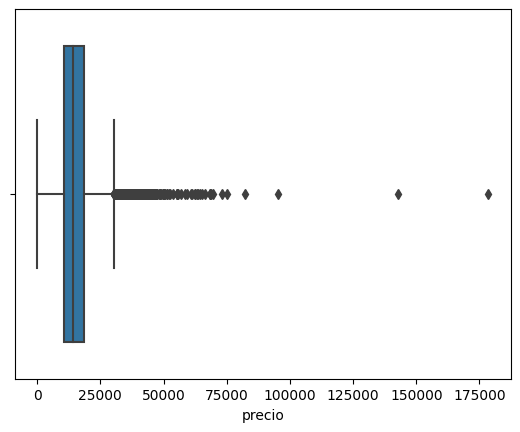

In [627]:
sns.boxplot(x=df_bmw2["precio"])

<Axes: >

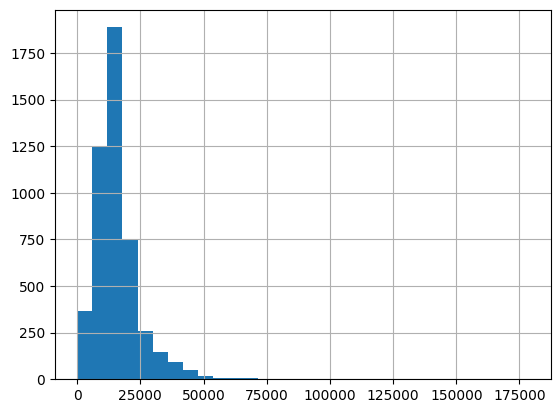

In [628]:
df_bmw2["precio"].hist(bins=30)

In [629]:
df_bmw2[df_bmw2["precio"]>=100000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_registro_venta,fecha_venta_month,venta_trimestre
4684,X4,103222.0,140.0,diesel,grey,suv,True,True,False,True,False,True,True,142800.0,4.0,8,venta_tercer_trimestre
4753,X3,72515.0,135.0,diesel,blue,suv,False,False,True,False,False,False,True,178500.0,5.0,8,venta_tercer_trimestre


Estos 2 precios me parecen muy elevados... Luego aplicaremos una función logaritmica que tiene una distribución muy sesgada a la derecha.

Ojo! con los valores más raros de precio... tanto muy altos como muy bajos

In [630]:
# Los coches con precio por debajo de 500€ pueden tener sentido
# son coches entre 100k-400k kms e incluso muchos registrados hace muchisimos años (muy antiguos)
df_bmw2[df_bmw2["precio"]<=500]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_registro_venta,fecha_venta_month,venta_trimestre
537,320,302006.0,100.0,diesel,desconocido,estate,False,True,False,False,False,True,False,500.0,6.0,4,venta_segundo_trimestre
565,320,179358.0,120.0,diesel,black,desconocido,False,True,False,False,False,True,True,100.0,5.0,3,venta_primer_trimestre
630,318,147558.0,105.0,diesel,white,estate,False,True,False,False,False,False,True,100.0,3.0,3,venta_primer_trimestre
879,318,134156.0,105.0,diesel,grey,estate,False,True,False,False,False,False,True,100.0,4.0,4,venta_segundo_trimestre
1255,320,170381.0,135.0,diesel,silver,desconocido,True,True,False,False,False,True,False,100.0,6.0,5,venta_segundo_trimestre
1513,520,358332.0,100.0,diesel,blue,desconocido,False,False,False,True,False,True,False,400.0,5.0,7,venta_tercer_trimestre
1558,520,358333.0,100.0,diesel,blue,estate,False,False,False,True,False,True,desconocido,400.0,5.0,7,venta_tercer_trimestre
1832,116,174524.0,85.0,diesel,blue,hatchback,False,True,False,False,False,True,desconocido,100.0,4.0,3,venta_primer_trimestre
2473,525,230578.0,85.0,diesel,desconocido,sedan,False,True,False,False,False,True,desconocido,200.0,21.0,8,venta_tercer_trimestre
2574,525,229880.0,85.0,diesel,black,sedan,False,True,False,False,False,True,False,200.0,21.0,8,venta_tercer_trimestre


### - modelo

In [631]:
df_bmw3 = df_bmw2.copy()
df_bmw3.modelo.unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', 'Desconocido', '525', '530',
       '535', '320 Gran Turismo', '518', '116', '328', '523', 'X3',
       'M550', '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

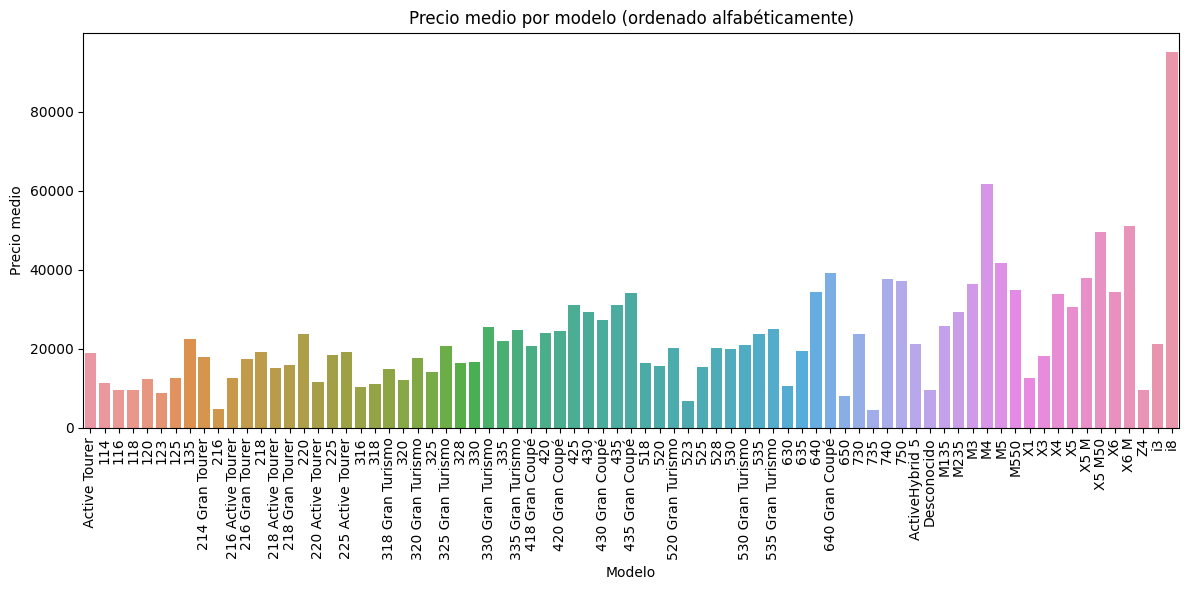

In [632]:
#Calculamos el precio medio por modelo y lo visualizamos
average_price_by_model = df_bmw2.groupby('modelo')['precio'].mean().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_model.index, y=average_price_by_model.values)
plt.xticks(rotation=90)
plt.xlabel("Modelo")
plt.ylabel("Precio medio")
plt.title("Precio medio por modelo (ordenado alfabéticamente)")
plt.tight_layout()
plt.show()

Crearemos una nueva variable para agrupar los modelos, siguiendo las políticas de Serie de BMW: el primer caracter refleja el modelo de serie

In [633]:
def agrupar_modelo(modelo):
    modelo = str(modelo).lower() # Asegura que es string y en minúsculas
    if 'hybrid' in modelo:
        return 'Serie_Hybrid'
    elif ' active tourer' in modelo:
        return 'Serie_2'
    elif 'desconocido' in modelo:
        return 'Desconocido'
    elif modelo.startswith('1'):
        return 'Serie_1'
    elif modelo.startswith('2'):
        return 'Serie_2'
    elif modelo.startswith('3'):
        return 'Serie_3'
    elif modelo.startswith('4'):
        return 'Serie_4'
    elif modelo.startswith('5'):
        return 'Serie_5'
    elif modelo.startswith('6'):
        return 'Serie_6'
    elif modelo.startswith('7'):
        return 'Serie_7'
    elif modelo.startswith('8'):
        return 'Serie_8'
    elif modelo.startswith('x'):
        return 'Serie_X'
    elif modelo.startswith('z'):
        return 'Serie_Z'
    elif modelo.startswith('i'):
        return 'Serie_i'
    elif modelo.startswith('m'):
        return 'Serie_M'
    else:
        return 'Otro'

# Aplicar la función sobre la columna 'modelo'
df_bmw3['modelo_grupo'] = df_bmw3['modelo'].apply(agrupar_modelo)


#Para comprobar:
df_bmw3['modelo_grupo'].value_counts()


modelo_grupo
Serie_3         1795
Serie_5         1137
Serie_X         1061
Serie_1          563
Serie_4          102
Serie_7           54
Serie_2           50
Serie_6           31
Serie_M           26
Serie_i            7
Serie_Z            6
Desconocido        3
Serie_Hybrid       1
Name: count, dtype: int64

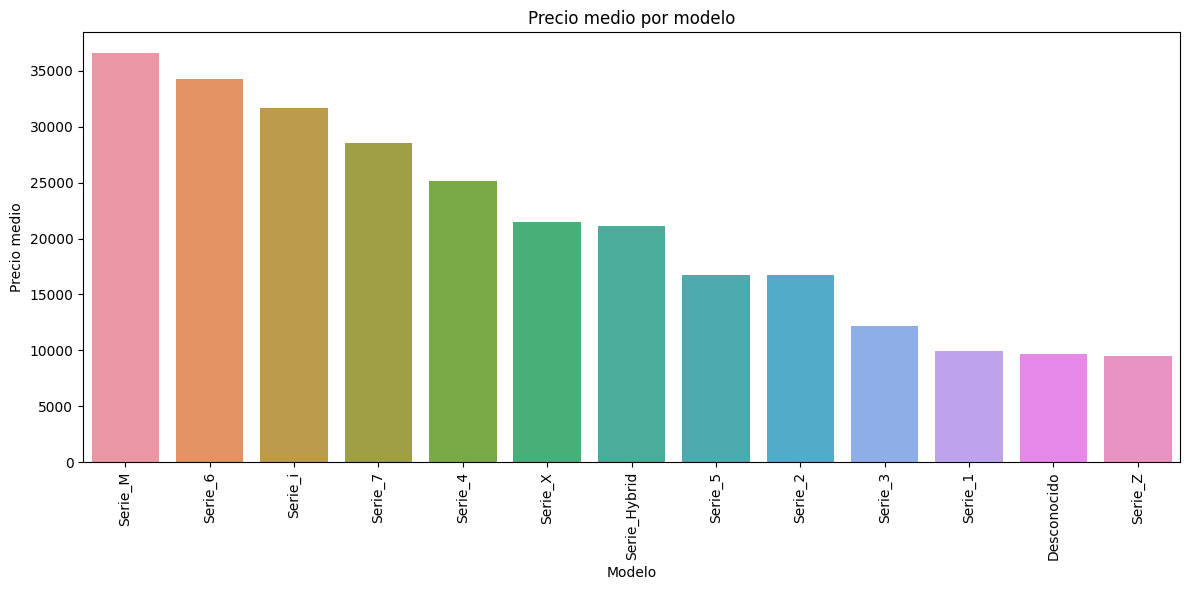

In [634]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average price for each cleaned model
average_price_by_model = df_bmw3.groupby('modelo_grupo')['precio'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_model.index, y=average_price_by_model.values)
plt.xticks(rotation=90)
plt.xlabel("Modelo")
plt.ylabel("Precio medio")
plt.title("Precio medio por modelo")
plt.tight_layout()
plt.show()

In [635]:
#Borramos la columna modelo original
df_bmw3.drop(columns='modelo', inplace=True)

In [636]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4836 non-null   float64
 1   potencia              4836 non-null   float64
 2   tipo_gasolina         4836 non-null   object 
 3   color                 4836 non-null   object 
 4   tipo_coche            4836 non-null   object 
 5   volante_regulable     4836 non-null   bool   
 6   aire_acondicionado    4836 non-null   bool   
 7   camara_trasera        4836 non-null   bool   
 8   elevalunas_electrico  4836 non-null   bool   
 9   bluetooth             4836 non-null   bool   
 10  gps                   4836 non-null   bool   
 11  alerta_lim_velocidad  4836 non-null   object 
 12  precio                4836 non-null   float64
 13  años_registro_venta   4836 non-null   float64
 14  fecha_venta_month     4836 non-null   int32  
 15  venta_trimestre       4836

### km

In [637]:
df_bmw.km.describe()

count    4.836000e+03
mean     1.409398e+05
std      6.018627e+04
min     -6.400000e+01
25%      1.028770e+05
50%      1.410270e+05
75%      1.752215e+05
max      1.000376e+06
Name: km, dtype: float64

<Axes: xlabel='km'>

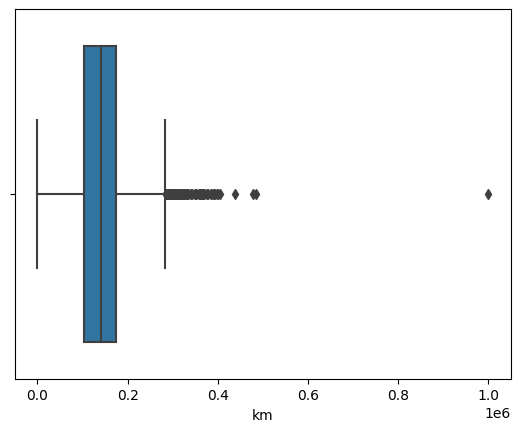

In [638]:
sns.boxplot(data = df_bmw, x = 'km')

In [639]:
df_bmw3[df_bmw3["km"]>400000] # estos pueden ser, aunq me parece muy raro que un coche tenga casi 500k (pero es posible)

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_registro_venta,fecha_venta_month,venta_trimestre,modelo_grupo
557,484615.0,120.0,diesel,blue,estate,True,True,False,False,False,True,False,8300.0,7.0,3,venta_primer_trimestre,Serie_5
1573,400654.0,110.0,diesel,black,estate,False,False,True,False,False,True,False,1800.0,12.0,7,venta_tercer_trimestre,Serie_3
2350,477571.0,85.0,diesel,grey,desconocido,False,True,False,False,True,False,False,1200.0,5.0,7,venta_tercer_trimestre,Serie_3
2829,439060.0,105.0,diesel,silver,desconocido,False,False,True,False,False,True,False,100.0,5.0,3,venta_primer_trimestre,Serie_5
3198,405816.0,100.0,diesel,blue,sedan,False,False,False,False,False,True,False,500.0,18.0,5,venta_segundo_trimestre,Serie_3
3732,1000376.0,90.0,diesel,desconocido,desconocido,True,False,False,False,False,True,False,1400.0,13.0,6,venta_segundo_trimestre,Serie_1


In [640]:
# pero el que es imposible es el de 1M de kms
df_bmw3[df_bmw3["km"]==1000376]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_registro_venta,fecha_venta_month,venta_trimestre,modelo_grupo
3732,1000376.0,90.0,diesel,desconocido,desconocido,True,False,False,False,False,True,False,1400.0,13.0,6,venta_segundo_trimestre,Serie_1


In [641]:
df_bmw3[df_bmw3["km"]<0] # Esto es un error

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_registro_venta,fecha_venta_month,venta_trimestre,modelo_grupo
2938,-64.0,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,5.0,4,venta_segundo_trimestre,Serie_6


In [642]:
print(df_bmw3["km"].mean())
print(df_bmw3["km"].median())

140939.83327041438
141027.0


Inferimos tanto, el registro que tiene kms negativos como el que tiene 1M de kms, con la media

In [643]:
df_bmw3["km"] = np.where(df_bmw3["km"]<0, round(df_bmw3["km"].mean(),0), df_bmw3["km"])
df_bmw3["km"] = np.where(df_bmw3["km"]>1000000, round(df_bmw3["km"].mean(),0), df_bmw3["km"])

In [644]:
df_bmw3.km.describe()

count      4836.000000
mean     140791.280127
std       58868.370051
min         476.000000
25%      102928.250000
50%      140980.000000
75%      175184.750000
max      484615.000000
Name: km, dtype: float64

### - potencia

In [645]:
df_bmw3.potencia.describe()

count    4836.000000
mean      128.996895
std        39.010955
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

<Axes: xlabel='potencia'>

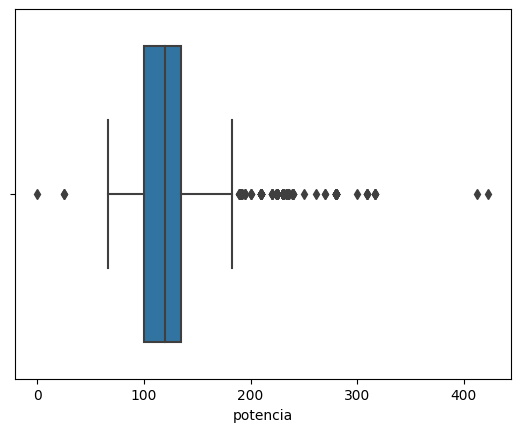

In [646]:
sns.boxplot(data = df_bmw3, x = 'potencia')

In [647]:
df_bmw3[df_bmw3["potencia"]>300]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_registro_venta,fecha_venta_month,venta_trimestre,modelo_grupo
1,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,3.0,2,venta_primer_trimestre,Serie_M
67,29925.0,309.0,petrol,silver,desconocido,True,True,False,True,True,True,True,47000.0,7.0,4,venta_segundo_trimestre,Serie_M
72,69410.0,317.0,petrol,white,desconocido,True,True,False,False,True,True,True,53600.0,3.0,3,venta_primer_trimestre,Serie_M
73,170550.0,309.0,petrol,grey,coupe,True,True,False,True,False,True,True,28000.0,7.0,3,venta_primer_trimestre,Serie_M
93,99283.0,309.0,petrol,silver,desconocido,False,False,False,True,False,True,True,28600.0,7.0,4,venta_segundo_trimestre,Serie_M
139,169970.0,309.0,petrol,grey,coupe,True,True,False,True,False,True,True,35700.0,7.0,8,venta_tercer_trimestre,Serie_M
2944,33670.0,317.0,petrol,blue,sedan,True,True,False,False,True,True,True,51200.0,4.0,4,venta_segundo_trimestre,Serie_M
3092,39250.0,317.0,petrol,black,sedan,True,True,False,False,True,True,True,52400.0,2.0,5,venta_segundo_trimestre,Serie_M
3601,150187.0,412.0,petrol,white,sedan,True,True,True,True,True,True,True,41600.0,6.0,9,venta_tercer_trimestre,Serie_M
4146,2970.0,423.0,petrol,red,suv,True,True,True,False,False,True,True,82400.0,2.0,4,venta_segundo_trimestre,Serie_X


In [648]:
df_bmw3[df_bmw3["potencia"]==0]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_registro_venta,fecha_venta_month,venta_trimestre,modelo_grupo
3765,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,desconocido,11700.0,3.0,3,venta_primer_trimestre,Serie_X


In [649]:
df_bmw3[df_bmw3["potencia"]<=70]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_registro_venta,fecha_venta_month,venta_trimestre,modelo_grupo
1796,152328.0,25.0,hybrid_petrol,black,desconocido,False,True,False,False,False,True,desconocido,20300.0,4.0,4,venta_segundo_trimestre,Serie_i
1804,179307.0,70.0,diesel,blue,hatchback,False,True,False,False,False,True,False,8300.0,5.0,7,venta_tercer_trimestre,Serie_1
1847,100398.0,70.0,diesel,white,hatchback,False,True,False,False,True,True,False,10700.0,5.0,2,venta_primer_trimestre,Serie_1
1925,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,15500.0,4.0,3,venta_primer_trimestre,Serie_i
1983,57344.0,70.0,diesel,grey,desconocido,False,True,False,False,False,True,False,11800.0,5.0,3,venta_primer_trimestre,Serie_1
1988,150373.0,70.0,diesel,brown,hatchback,False,True,False,False,False,True,False,8200.0,5.0,3,venta_primer_trimestre,Serie_1
2001,72527.0,70.0,diesel,silver,desconocido,False,True,False,False,False,True,False,9300.0,4.0,3,venta_primer_trimestre,Serie_1
2273,87768.0,70.0,diesel,brown,desconocido,False,False,False,False,False,True,False,6200.0,5.0,6,venta_segundo_trimestre,Serie_1
2390,170529.0,66.0,diesel,silver,hatchback,False,False,True,False,False,False,False,1000.0,6.0,8,venta_tercer_trimestre,Serie_3
2771,146951.0,66.0,petrol,white,sedan,False,False,False,False,False,False,False,1300.0,28.0,4,venta_segundo_trimestre,Serie_3


In [650]:
### Solamente está mal el valor 0.0
#Modelo X1, cogemos la moda para inferir el valor

In [651]:
df_bmw2["potencia"][df_bmw2["modelo"]=="X1"].mean()
df_bmw3["potencia"] = np.where(df_bmw3["potencia"]<=0, round(df_bmw2["potencia"][df_bmw2["modelo"]=="X1"].mean(),1), df_bmw3["potencia"])
df_bmw3[df_bmw3["potencia"]==0]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_registro_venta,fecha_venta_month,venta_trimestre,modelo_grupo


### - tipo_gasolina

In [652]:
df_bmw3.tipo_gasolina.value_counts()

tipo_gasolina
diesel           4634
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

Como casi toda la base es de diesel, vemos la media de precio por tipo_gasolina para ver si nos ayuda a decidir si la mantenemos o eliminamos.

In [653]:
df_bmw3.groupby("tipo_gasolina")["precio"].mean()

tipo_gasolina
diesel           15852.654294
electro          20966.666667
hybrid_petrol    37575.000000
petrol           14398.429319
Name: precio, dtype: float64

En principio la dejamos, se ve:
 como si es de petróleo, los coches son los más baratos, los

*   si es de petróleo, los coches son los más baratos
*   si es de hybrid_petrol, los coches son los más caros (OJO aqui que son significativamente caros)
*   si es de electro, los coches también destacan por ser más caros que los de diesel.




In [654]:
df_bmw3[df_bmw3["tipo_gasolina"]=='hybrid_petrol']

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_registro_venta,fecha_venta_month,venta_trimestre,modelo_grupo
90,12402.0,170.0,hybrid_petrol,grey,coupe,True,True,False,False,False,False,True,95200.0,6.0,4,venta_segundo_trimestre,Serie_i
1796,152328.0,25.0,hybrid_petrol,black,desconocido,False,True,False,False,False,True,desconocido,20300.0,4.0,4,venta_segundo_trimestre,Serie_i
1925,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,15500.0,4.0,3,venta_primer_trimestre,Serie_i
2925,94374.0,225.0,hybrid_petrol,brown,sedan,True,True,False,True,True,True,True,21100.0,6.0,4,venta_segundo_trimestre,Serie_Hybrid
3690,6572.0,75.0,hybrid_petrol,black,desconocido,True,True,True,False,False,True,desconocido,28000.0,2.0,3,venta_primer_trimestre,Serie_i
4018,33639.0,180.0,hybrid_petrol,grey,suv,True,True,False,True,False,True,True,52200.0,4.0,3,venta_primer_trimestre,Serie_X
4214,129317.0,230.0,hybrid_petrol,blue,suv,True,False,False,False,False,True,True,46300.0,4.0,4,venta_segundo_trimestre,Serie_X
4370,134154.0,300.0,hybrid_petrol,black,desconocido,True,True,False,True,False,True,True,22000.0,8.0,6,venta_segundo_trimestre,Serie_X


### - color

In [655]:
df_bmw3.color.value_counts()

color
black          1498
grey           1069
blue            644
white           484
desconocido     444
brown           302
silver          291
red              47
beige            37
green            14
orange            6
Name: count, dtype: int64

In [656]:
df_bmw3.groupby("color")["precio"].mean()

color
beige          14916.216216
black          16198.064085
blue           15232.763975
brown          15545.695364
desconocido    15526.576577
green           6935.714286
grey           15613.844715
orange         18866.666667
red            16642.553191
silver         14872.508591
white          17248.140496
Name: precio, dtype: float64

La variable color no necesita más tratamiento. Posteriormente la convertiremos a numérica.

### - tipo coche

In [657]:
df_bmw3.tipo_coche.value_counts()

tipo_coche
desconocido    1457
estate         1104
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            75
convertible      30
van              29
Name: count, dtype: int64

La variable tipo_coche no necesita más tratamiento. Posteriormente la convertiremos a numérica.

### - volante_regulable

In [658]:
df_bmw3.volante_regulable.value_counts()

volante_regulable
True     2661
False    2175
Name: count, dtype: int64

### - aire_acondicionado

In [659]:
df_bmw3.aire_acondicionado.value_counts()

aire_acondicionado
True     3946
False     890
Name: count, dtype: int64

### - camara_trasera

In [660]:
df_bmw3.camara_trasera.value_counts()

camara_trasera
False    3863
True      973
Name: count, dtype: int64

### - elevalunas_electrico

In [661]:
df_bmw3.elevalunas_electrico.value_counts()

elevalunas_electrico
False    2610
True     2226
Name: count, dtype: int64

### - bluetooth

In [662]:
df_bmw3.bluetooth.value_counts()

bluetooth
False    3842
True      994
Name: count, dtype: int64

### - gps

In [663]:
df_bmw3.gps.value_counts()

gps
True     4507
False     329
Name: count, dtype: int64

Todos estos campos booleanos no necesitan más tratamiento salvo el posterior de convertirlos a 0/1

### - alerta_lim_velocidad

In [664]:
df_bmw3.alerta_lim_velocidad.value_counts()

alerta_lim_velocidad
True           2236
False          1872
desconocido     728
Name: count, dtype: int64

Como hemos convertido esta variable booleana a categórica, vamos a darle algo de formato para luego transformarla a numérica:

In [665]:
df_bmw3["alerta_lim_velocidad"] = df_bmw3["alerta_lim_velocidad"].map({True: 'si', False: 'no', 'desconocido': 'desconocido'})

In [666]:
df_bmw3.alerta_lim_velocidad.value_counts()

alerta_lim_velocidad
si             2236
no             1872
desconocido     728
Name: count, dtype: int64

# **PASO 4: OUTLIERS**

Una vez identificados los campos con outliers, pasamos a tratarlos.

<Axes: >

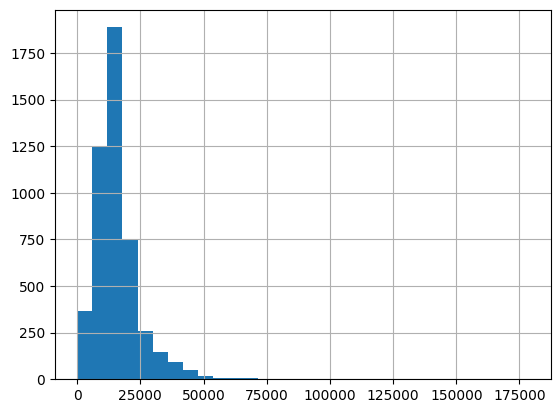

In [667]:
df_bmw4 = df_bmw3.copy()
df_bmw4['precio'].hist(bins=30)

In [668]:
# Para variables con distribuciones muy sesgadas hacia la izq aplicamos una función logaritmica
df_bmw4['precio_log'] = np.log1p(df_bmw4['precio'])

<Axes: >

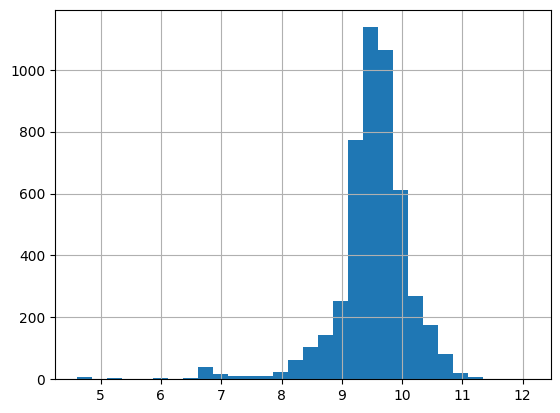

In [669]:
df_bmw4['precio_log'].hist(bins=30)

<Axes: xlabel='km', ylabel='precio'>

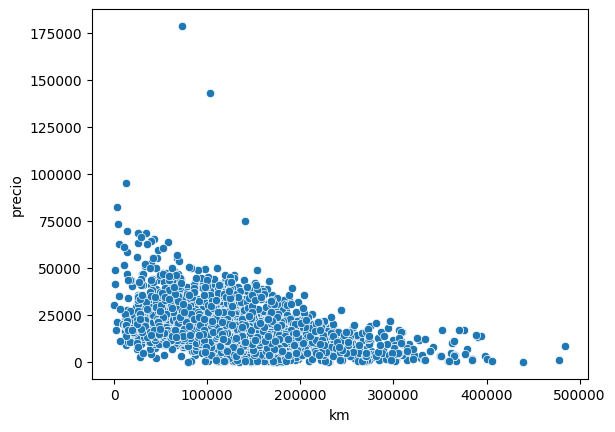

In [670]:
sns.scatterplot(data=df_bmw4, x='km', y='precio')

<Axes: xlabel='km'>

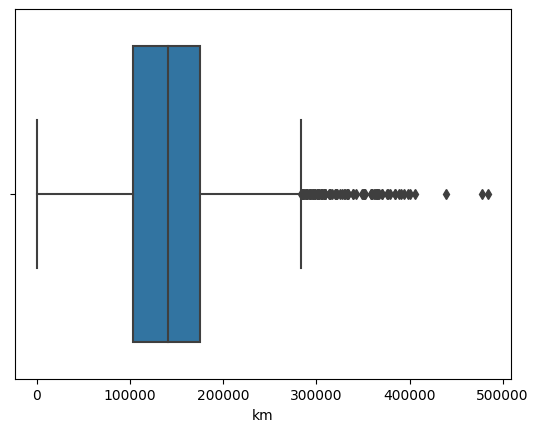

In [671]:
sns.boxplot(data = df_bmw4, x = 'km')

<Axes: xlabel='potencia', ylabel='precio'>

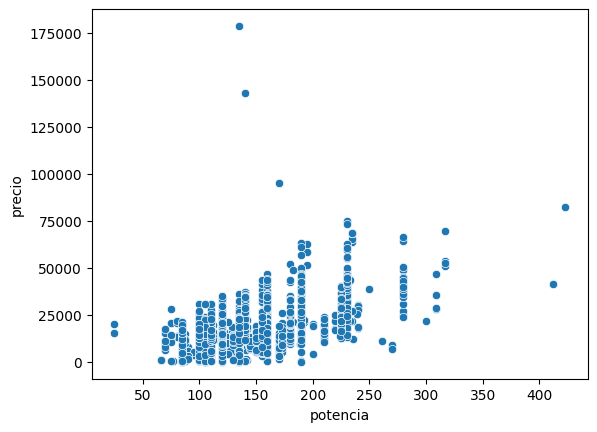

In [672]:
sns.scatterplot(data=df_bmw4, x='potencia', y='precio')

<Axes: xlabel='potencia'>

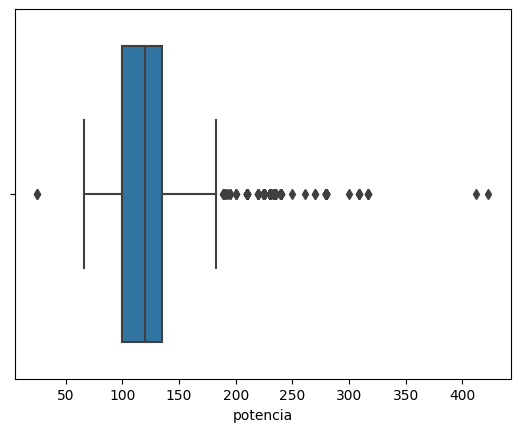

In [673]:
sns.boxplot(data = df_bmw4, x = 'potencia')

In [674]:
# Consideramos que los valores atípicos de kms y potencia pueden ser válidos, pero pueden distorsionar el modelo.
# Solución: aplicamos transformaciones logaritmicas también para estas dos variables:

df_bmw4['potencia_log'] = np.log1p(df_bmw4['potencia'])
df_bmw4['km_log'] = np.log1p(df_bmw4['km'])

In [675]:
cols_to_drop = ['km','potencia','precio']
df_bmw4.drop(columns=cols_to_drop, inplace=True)

# **PASO 5: NORMALIZACIÓN**

El precio no se toca que es el target.

Variables a escalar con minmaxscaler:


1.   las numéricas: SI
2.   las booleanas: convertirlas a 0/1
3.   las categóricas: al paso 5, OneHotEnconding




In [676]:
df_bmw5 = df_bmw4.copy()
df_bmw5.dtypes

tipo_gasolina            object
color                    object
tipo_coche               object
volante_regulable          bool
aire_acondicionado         bool
camara_trasera             bool
elevalunas_electrico       bool
bluetooth                  bool
gps                        bool
alerta_lim_velocidad     object
años_registro_venta     float64
fecha_venta_month         int32
venta_trimestre          object
modelo_grupo             object
precio_log              float64
potencia_log            float64
km_log                  float64
dtype: object

In [677]:
# Si hiciera falta transformar las booleanas:
#for col in ['volante_regulable','aire_acondicionado','camara_trasera','elevalunas_electrico','bluetooth', 'gps']:
#  df_bmw5[col] = df_bmw5[col].astype('bool')

In [678]:
target = ['precio_log']

def obtener_lista_variables(dataset):
    lista_numericas = []
    lista_boolean = []
    lista_categoricas = []

    for i in dataset:
        if i in target:
            continue  # saltar si es target o no queremos usarla

        kind = dataset[i].dtype.kind

        if kind == "b":  # si es boolean
            lista_boolean.append(i)
        elif kind in ("f", "i"):
            if len(dataset[i].unique()) == 2:
                lista_boolean.append(i)
            else:
                lista_numericas.append(i)
        elif kind == "O":
            lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas


In [679]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_bmw5)

In [680]:
lista_numericas

['años_registro_venta', 'fecha_venta_month', 'potencia_log', 'km_log']

In [681]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps']

In [682]:
lista_categoricas

['tipo_gasolina',
 'color',
 'tipo_coche',
 'alerta_lim_velocidad',
 'venta_trimestre',
 'modelo_grupo']

In [683]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tipo_gasolina         4836 non-null   object 
 1   color                 4836 non-null   object 
 2   tipo_coche            4836 non-null   object 
 3   volante_regulable     4836 non-null   bool   
 4   aire_acondicionado    4836 non-null   bool   
 5   camara_trasera        4836 non-null   bool   
 6   elevalunas_electrico  4836 non-null   bool   
 7   bluetooth             4836 non-null   bool   
 8   gps                   4836 non-null   bool   
 9   alerta_lim_velocidad  4836 non-null   object 
 10  años_registro_venta   4836 non-null   float64
 11  fecha_venta_month     4836 non-null   int32  
 12  venta_trimestre       4836 non-null   object 
 13  modelo_grupo          4836 non-null   object 
 14  precio_log            4836 non-null   float64
 15  potencia_log          4836

**Normalizamos valores de las variables numéricas:**

In [684]:
df_bmw5[lista_numericas]

,años_registro_venta,fecha_venta_month,potencia_log,km_log
0,6.0,1,4.615121,11.852336
1,3.0,2,5.762051,9.541800
2,6.0,2,4.795791,12.118869
3,4.0,2,4.912655,11.760067
4,6.0,4,5.081404,11.483476
...,...,...,...,...
4838,3.0,8,4.709530,10.590214
4839,3.0,8,4.615121,10.816433
4840,3.0,9,4.709530,9.885018
4841,2.0,9,4.709530,10.237134


In [685]:
scaler = MinMaxScaler()

In [686]:
df_bmw5[lista_numericas] = scaler.fit_transform(df_bmw5[lista_numericas]) # Transformamos las variables numéricas del dataset con MinMaxScaler


**Las variables booleanas las pasamos a variables enteras del tipo 0/1:**

In [687]:
df_bmw5[lista_boolean]

,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps
0,True,True,False,True,False,True
1,True,True,False,False,True,True
2,False,False,False,True,False,True
3,True,True,False,True,True,True
4,True,True,False,False,True,True
...,...,...,...,...,...,...
4838,False,True,False,False,False,True
4839,False,True,False,False,False,True
4840,False,True,False,False,False,True
4841,True,True,False,False,False,True


In [688]:
df_bmw5[lista_boolean] = df_bmw5[lista_boolean].astype(int)

# **PASO 5: ONE HOT ENCODING**

**Y, finalmente, aquí realizamos la transformación de las variables categóricas en numéricas:**

Antes de ello vamos a pintar una matriz de correlación, para ver cómo vamos:

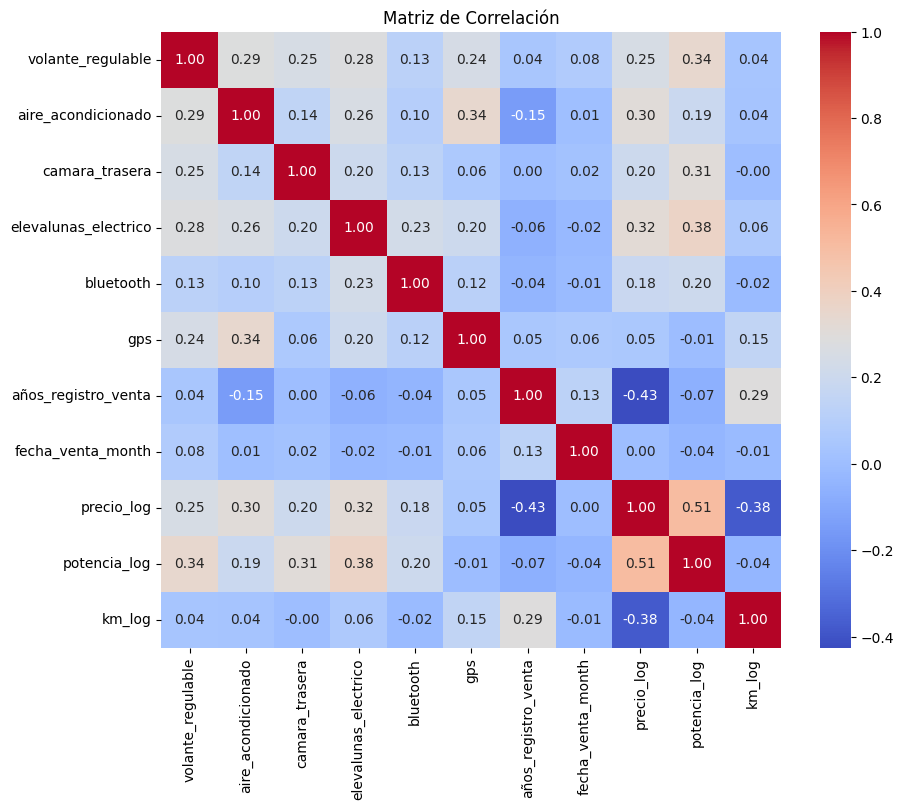

In [689]:
df_corr = df_bmw5.select_dtypes(include=['number','boolean'])

correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [690]:
df_bmw5[lista_categoricas]

,tipo_gasolina,color,tipo_coche,alerta_lim_velocidad,venta_trimestre,modelo_grupo
0,diesel,black,desconocido,desconocido,venta_primer_trimestre,Serie_1
1,petrol,grey,convertible,si,venta_primer_trimestre,Serie_M
2,diesel,white,desconocido,no,venta_primer_trimestre,Serie_3
3,diesel,red,convertible,desconocido,venta_primer_trimestre,Serie_4
4,diesel,silver,desconocido,si,venta_segundo_trimestre,Serie_4
...,...,...,...,...,...,...
4838,diesel,black,desconocido,no,venta_tercer_trimestre,Serie_2
4839,diesel,grey,desconocido,si,venta_tercer_trimestre,Serie_2
4840,diesel,grey,van,si,venta_tercer_trimestre,Serie_2
4841,diesel,brown,van,si,venta_tercer_trimestre,Serie_2


In [691]:
# Primero hay que analizar una a una, porque no todos los valores serán relevantes para convertirse en columna

In [692]:
for col in lista_categoricas:
    print(df_bmw5[col].value_counts())
    print("-------------------------")

tipo_gasolina
diesel           4634
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64
-------------------------
color
black          1498
grey           1069
blue            644
white           484
desconocido     444
brown           302
silver          291
red              47
beige            37
green            14
orange            6
Name: count, dtype: int64
-------------------------
tipo_coche
desconocido    1457
estate         1104
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            75
convertible      30
van              29
Name: count, dtype: int64
-------------------------
alerta_lim_velocidad
si             2236
no             1872
desconocido     728
Name: count, dtype: int64
-------------------------
venta_trimestre
venta_segundo_trimestre    2106
venta_primer_trimestre     1443
venta_tercer_trimestre     1287
Name: count, dtype: int64
-------------------------
modelo_grupo
Serie_3        

In [693]:
for col in lista_categoricas:
    print(df_bmw5[col].value_counts(normalize=True))
    print("-------------------------")

tipo_gasolina
diesel           0.958230
petrol           0.039495
hybrid_petrol    0.001654
electro          0.000620
Name: proportion, dtype: float64
-------------------------
color
black          0.309760
grey           0.221050
blue           0.133168
white          0.100083
desconocido    0.091811
brown          0.062448
silver         0.060174
red            0.009719
beige          0.007651
green          0.002895
orange         0.001241
Name: proportion, dtype: float64
-------------------------
tipo_coche
desconocido    0.301282
estate         0.228288
sedan          0.169768
suv            0.156121
hatchback      0.100910
subcompact     0.015922
coupe          0.015509
convertible    0.006203
van            0.005997
Name: proportion, dtype: float64
-------------------------
alerta_lim_velocidad
si             0.462366
no             0.387097
desconocido    0.150538
Name: proportion, dtype: float64
-------------------------
venta_trimestre
venta_segundo_trimestre    0.435484
vent

In [694]:
df_bmw5

,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,años_registro_venta,fecha_venta_month,venta_trimestre,modelo_grupo,precio_log,potencia_log,km_log
0,diesel,black,desconocido,1,1,0,1,0,1,desconocido,0.185185,0.000,venta_primer_trimestre,Serie_1,9.332646,0.486103,0.821079
1,petrol,grey,convertible,1,1,0,0,1,1,si,0.074074,0.125,venta_primer_trimestre,Serie_M,11.151970,0.896949,0.487360
2,diesel,white,desconocido,0,0,0,1,0,1,no,0.185185,0.125,venta_primer_trimestre,Serie_3,9.230241,0.550822,0.859575
3,diesel,red,convertible,1,1,0,1,1,1,desconocido,0.111111,0.125,venta_primer_trimestre,Serie_4,10.130663,0.592684,0.807752
4,diesel,silver,desconocido,1,1,0,0,1,1,si,0.185185,0.375,venta_segundo_trimestre,Serie_4,10.416341,0.653132,0.767803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,diesel,black,desconocido,0,1,0,0,0,1,no,0.074074,0.875,venta_tercer_trimestre,Serie_2,9.588845,0.519922,0.638786
4839,diesel,grey,desconocido,0,1,0,0,0,1,si,0.074074,0.875,venta_tercer_trimestre,Serie_2,9.770013,0.486103,0.671460
4840,diesel,grey,van,0,1,0,0,0,1,si,0.074074,1.000,venta_tercer_trimestre,Serie_2,9.741027,0.519922,0.536932
4841,diesel,brown,van,1,1,0,0,0,1,si,0.037037,1.000,venta_tercer_trimestre,Serie_2,10.030164,0.519922,0.587790


In [695]:
def agrupar_valores_no_frecuentes(df, columna, umbral=0.025, nombre_categoria='otro', nombre_columna_salida=None):
    """
    Agrupa los valores menos frecuentes de una columna categórica en una categoría 'otro'.

    Parámetros:
    - df: DataFrame de entrada
    - columna: nombre de la columna categórica
    - umbral: umbral mínimo de frecuencia relativa (0.025 = 2,5%)
    - nombre_categoria: nombre que se asignará a los valores poco frecuentes
    - nombre_columna_salida: si se indica, crea una nueva columna con este nombre;
      si no, sobrescribe la columna original

    Retorna:
    - DataFrame con la columna modificada o añadida según nombre_columna_salida
    """
    proporciones = df[columna].value_counts(normalize=True)
    categorias_comunes = proporciones[proporciones >= umbral].index

    serie_modificada = df[columna].where(df[columna].isin(categorias_comunes), other=nombre_categoria)

    if nombre_columna_salida:
        df[nombre_columna_salida] = serie_modificada
    else:
        df[columna] = serie_modificada

    return df



In [696]:
# Como creemos que tenemos una cantidad de valores razonable, decidimos no agrupar y hacer OHE con todos los valores de la variable color y modelo
#df_bmw = agrupar_valores_no_frecuentes(df_bmw, 'color', umbral=0.025, nombre_categoria='otros', nombre_columna_salida='color_agrup')
#df_bmw = agrupar_valores_no_frecuentes(df_bmw, 'modelo_grupo', umbral=0.025, nombre_categoria='otros', nombre_columna_salida='modelo_grupo_agrup')

Una vez transformadas las dos variables que tenían muchos valores, hacemos el OHE para todas:

In [697]:
ohe_cols = lista_categoricas


ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int, handle_unknown='ignore')
encoded_array = ohe.fit_transform(df_bmw5[ohe_cols])

cols_encoded = ohe.get_feature_names_out(ohe_cols)
df_encoded = pd.DataFrame(encoded_array, columns=cols_encoded, index=df_bmw5.index)

df_bmw5 = pd.concat([df_bmw5, df_encoded], axis=1)

In [698]:
df_bmw5

,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,años_registro_venta,fecha_venta_month,venta_trimestre,modelo_grupo,precio_log,potencia_log,km_log,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_desconocido,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_coupe,tipo_coche_desconocido,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,alerta_lim_velocidad_no,alerta_lim_velocidad_si,venta_trimestre_venta_segundo_trimestre,venta_trimestre_venta_tercer_trimestre,modelo_grupo_Serie_1,modelo_grupo_Serie_2,modelo_grupo_Serie_3,modelo_grupo_Serie_4,modelo_grupo_Serie_5,modelo_grupo_Serie_6,modelo_grupo_Serie_7,modelo_grupo_Serie_Hybrid,modelo_grupo_Serie_M,modelo_grupo_Serie_X,modelo_grupo_Serie_Z,modelo_grupo_Serie_i
0,diesel,black,desconocido,1,1,0,1,0,1,desconocido,0.185185,0.000,venta_primer_trimestre,Serie_1,9.332646,0.486103,0.821079,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,petrol,grey,convertible,1,1,0,0,1,1,si,0.074074,0.125,venta_primer_trimestre,Serie_M,11.151970,0.896949,0.487360,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,diesel,white,desconocido,0,0,0,1,0,1,no,0.185185,0.125,venta_primer_trimestre,Serie_3,9.230241,0.550822,0.859575,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,diesel,red,convertible,1,1,0,1,1,1,desconocido,0.111111,0.125,venta_primer_trimestre,Serie_4,10.130663,0.592684,0.807752,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,diesel,silver,desconocido,1,1,0,0,1,1,si,0.185185,0.375,venta_segundo_trimestre,Serie_4,10.416341,0.653132,0.767803,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,diesel,black,desconocido,0,1,0,0,0,1,no,0.074074,0.875,venta_tercer_trimestre,Serie_2,9.588845,0.519922,0.638786,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4839,diesel,grey,desconocido,0,1,0,0,0,1,si,0.074074,0.875,venta_tercer_trimestre,Serie_2,9.770013,0.486103,0.671460,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4840,diesel,grey,van,0,1,0,0,0,1,si,0.074074,1.000,venta_tercer_trimestre,Serie_2,9.741027,0.519922,0.536932,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4841,diesel,brown,van,1,1,0,0,0,1,si,0.037037,1.000,venta_tercer_trimestre,Serie_2,10.030164,0.519922,0.587790,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [699]:
cols_to_drop = lista_categoricas
df_bmw5.drop(columns=cols_to_drop, inplace=True)

In [700]:
pd.set_option('display.max_columns', None)
df_bmw5.head()

,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,años_registro_venta,fecha_venta_month,precio_log,potencia_log,km_log,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_desconocido,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_coupe,tipo_coche_desconocido,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,alerta_lim_velocidad_no,alerta_lim_velocidad_si,venta_trimestre_venta_segundo_trimestre,venta_trimestre_venta_tercer_trimestre,modelo_grupo_Serie_1,modelo_grupo_Serie_2,modelo_grupo_Serie_3,modelo_grupo_Serie_4,modelo_grupo_Serie_5,modelo_grupo_Serie_6,modelo_grupo_Serie_7,modelo_grupo_Serie_Hybrid,modelo_grupo_Serie_M,modelo_grupo_Serie_X,modelo_grupo_Serie_Z,modelo_grupo_Serie_i
0,1,1,0,1,0,1,0.185185,0.000,9.332646,0.486103,0.821079,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,0.074074,0.125,11.151970,0.896949,0.487360,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0.185185,0.125,9.230241,0.550822,0.859575,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,1,0.111111,0.125,10.130663,0.592684,0.807752,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,1,1,0.185185,0.375,10.416341,0.653132,0.767803,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0


# **PASO 6: CORRELACIONES FINALES**

In [701]:
df_bmw6 = df_bmw5.copy()

In [702]:
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 0 to 4842
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   volante_regulable                        4836 non-null   int64  
 1   aire_acondicionado                       4836 non-null   int64  
 2   camara_trasera                           4836 non-null   int64  
 3   elevalunas_electrico                     4836 non-null   int64  
 4   bluetooth                                4836 non-null   int64  
 5   gps                                      4836 non-null   int64  
 6   años_registro_venta                      4836 non-null   float64
 7   fecha_venta_month                        4836 non-null   float64
 8   precio_log                               4836 non-null   float64
 9   potencia_log                             4836 non-null   float64
 10  km_log                                   4836 non-nul

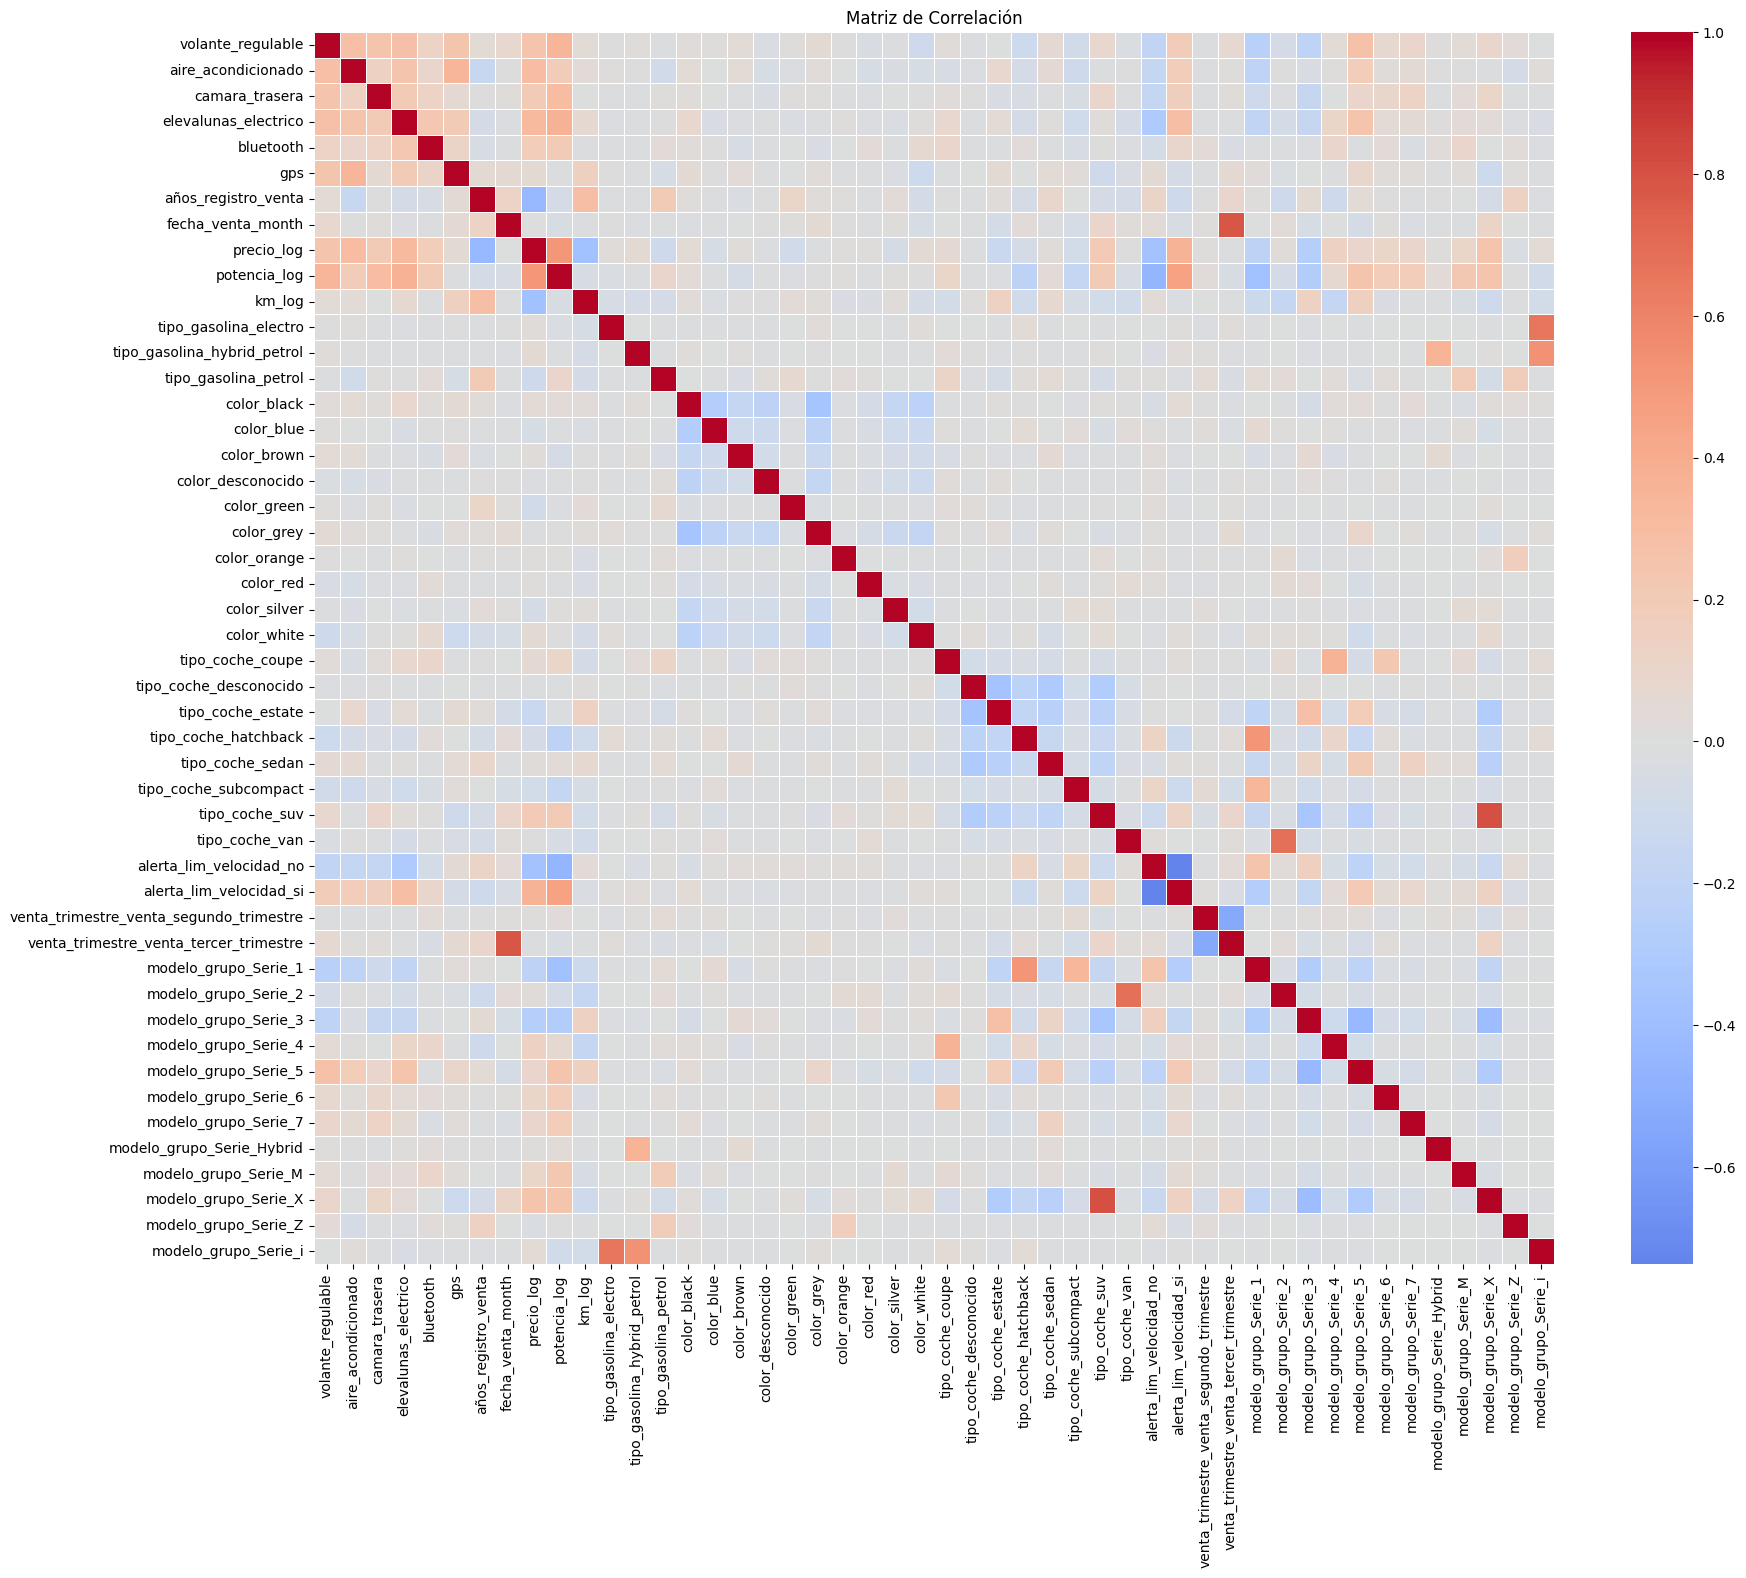

In [703]:
correlation_matrix = df_bmw6.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

Como vemos, hay algunas variables correladas que vamos a tener que quitar para no distorsionar la predicción del modelo.

## **VIF**

In [704]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Una vez tenemos las variables finales ya transformadas para el modelo, vamos a aplicar VIF para estudiar la multicolinealidad entre ellas.

1. Paso 1: Primero VIF por bloques temáticos, para limpiar redundancias dentro de cada grupo.

2. Paso 2: Luego, con las variables elegidas finalmente en el Paso 1, VIF global para asegurarte de que no arrastramos colinealidad entre grupos.

    VIF = 1
→ No hay multicolinealidad.

    VIF > 5
→ Multicolinealidad moderada.

    VIF > 10
→ Multicolinealidad alta → Considera eliminar o transformar.

### Fecha de venta del coche


In [705]:
df_bmw6.head()

,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,años_registro_venta,fecha_venta_month,precio_log,potencia_log,km_log,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_desconocido,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_coupe,tipo_coche_desconocido,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,alerta_lim_velocidad_no,alerta_lim_velocidad_si,venta_trimestre_venta_segundo_trimestre,venta_trimestre_venta_tercer_trimestre,modelo_grupo_Serie_1,modelo_grupo_Serie_2,modelo_grupo_Serie_3,modelo_grupo_Serie_4,modelo_grupo_Serie_5,modelo_grupo_Serie_6,modelo_grupo_Serie_7,modelo_grupo_Serie_Hybrid,modelo_grupo_Serie_M,modelo_grupo_Serie_X,modelo_grupo_Serie_Z,modelo_grupo_Serie_i
0,1,1,0,1,0,1,0.185185,0.000,9.332646,0.486103,0.821079,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,0.074074,0.125,11.151970,0.896949,0.487360,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0.185185,0.125,9.230241,0.550822,0.859575,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,1,0.111111,0.125,10.130663,0.592684,0.807752,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,1,1,0.185185,0.375,10.416341,0.653132,0.767803,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [706]:
X = df_bmw6[['años_registro_venta',
            'fecha_venta_month',
            'venta_trimestre_venta_segundo_trimestre',	'venta_trimestre_venta_tercer_trimestre']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                   feature        VIF
0                      años_registro_venta   3.605324
1                        fecha_venta_month  25.078092
2  venta_trimestre_venta_segundo_trimestre   7.271183
3   venta_trimestre_venta_tercer_trimestre  13.103950


Como es logico, tienen un VIF alto porque fecha_venta_month es un variable de ordenación de ventas, es decir, antes de ser estandarizada, tenia valores de 1,2,3,4,etc representando cada número a un mes del año. Y por otro lado, las variables venta_trimestre_venta_XXX_trimestre son variables 0/1 que indican si la venta del coche fue en el primer, segundo o tercer trimestre del año 2018 (parece que de septiembre a diciembre no hubo ventas).

In [707]:
# Decidimos quitar fecha_venta_month
df_final = df_bmw6.drop(columns='fecha_venta_month')

In [708]:
# vemos de nuevo el VIF sin la variable borrada:
X = df_bmw6[['años_registro_venta',
            'venta_trimestre_venta_segundo_trimestre',	'venta_trimestre_venta_tercer_trimestre']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                   feature       VIF
0                      años_registro_venta  2.579947
1  venta_trimestre_venta_segundo_trimestre  1.924193
2   venta_trimestre_venta_tercer_trimestre  1.655753


### Modelo de coche

In [709]:
X = df_bmw6[["modelo_grupo_Serie_1", "modelo_grupo_Serie_2", "modelo_grupo_Serie_3", "modelo_grupo_Serie_4", "modelo_grupo_Serie_5", "modelo_grupo_Serie_6", "modelo_grupo_Serie_7", "modelo_grupo_Serie_M", "modelo_grupo_Serie_X", "modelo_grupo_Serie_Z", "modelo_grupo_Serie_i", "modelo_grupo_Serie_Hybrid"]]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                      feature  VIF
0        modelo_grupo_Serie_1  1.0
1        modelo_grupo_Serie_2  1.0
2        modelo_grupo_Serie_3  1.0
3        modelo_grupo_Serie_4  1.0
4        modelo_grupo_Serie_5  1.0
5        modelo_grupo_Serie_6  1.0
6        modelo_grupo_Serie_7  1.0
7        modelo_grupo_Serie_M  1.0
8        modelo_grupo_Serie_X  1.0
9        modelo_grupo_Serie_Z  1.0
10       modelo_grupo_Serie_i  1.0
11  modelo_grupo_Serie_Hybrid  1.0


### Color de coche

In [710]:
X = df_bmw6[["color_blue", "color_brown", "color_desconocido", "color_grey", "color_green", "color_silver", "color_white", "color_orange", "color_red"]]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

             feature  VIF
0         color_blue  1.0
1        color_brown  1.0
2  color_desconocido  1.0
3         color_grey  1.0
4        color_green  1.0
5       color_silver  1.0
6        color_white  1.0
7       color_orange  1.0
8          color_red  1.0


En principio, con el resto de variables temáticas transformadas con el OHE vamos a obtener lo mismo, asi que vamos a aplicar VIF general.

In [711]:
X = df_final.drop(columns=["precio_log"])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                    feature         VIF
0                         volante_regulable    3.133440
1                        aire_acondicionado    7.329478
2                            camara_trasera    1.468593
3                      elevalunas_electrico    2.581739
4                                 bluetooth    1.439178
5                                       gps   19.362231
6                       años_registro_venta    7.125748
7                              potencia_log   73.932378
8                                    km_log  127.420598
9                     tipo_gasolina_electro    2.787489
10              tipo_gasolina_hybrid_petrol    2.694077
11                     tipo_gasolina_petrol    1.233463
12                              color_black   39.728955
13                               color_blue   17.641693
14                              color_brown    8.784020
15                        color_desconocido   12.466224
16                              color_green    1

Antes se veía como todas las variables numéricas fruto de la transformación de variables categoricas originales tienen una multicolinealidad perfecta. Solución: en el OneHotEncoding hemos elimnado una variable con drop='first'

Aún así, se sigue viendo una fuerte correlación entre variables y tenemos que eliminar alguna:

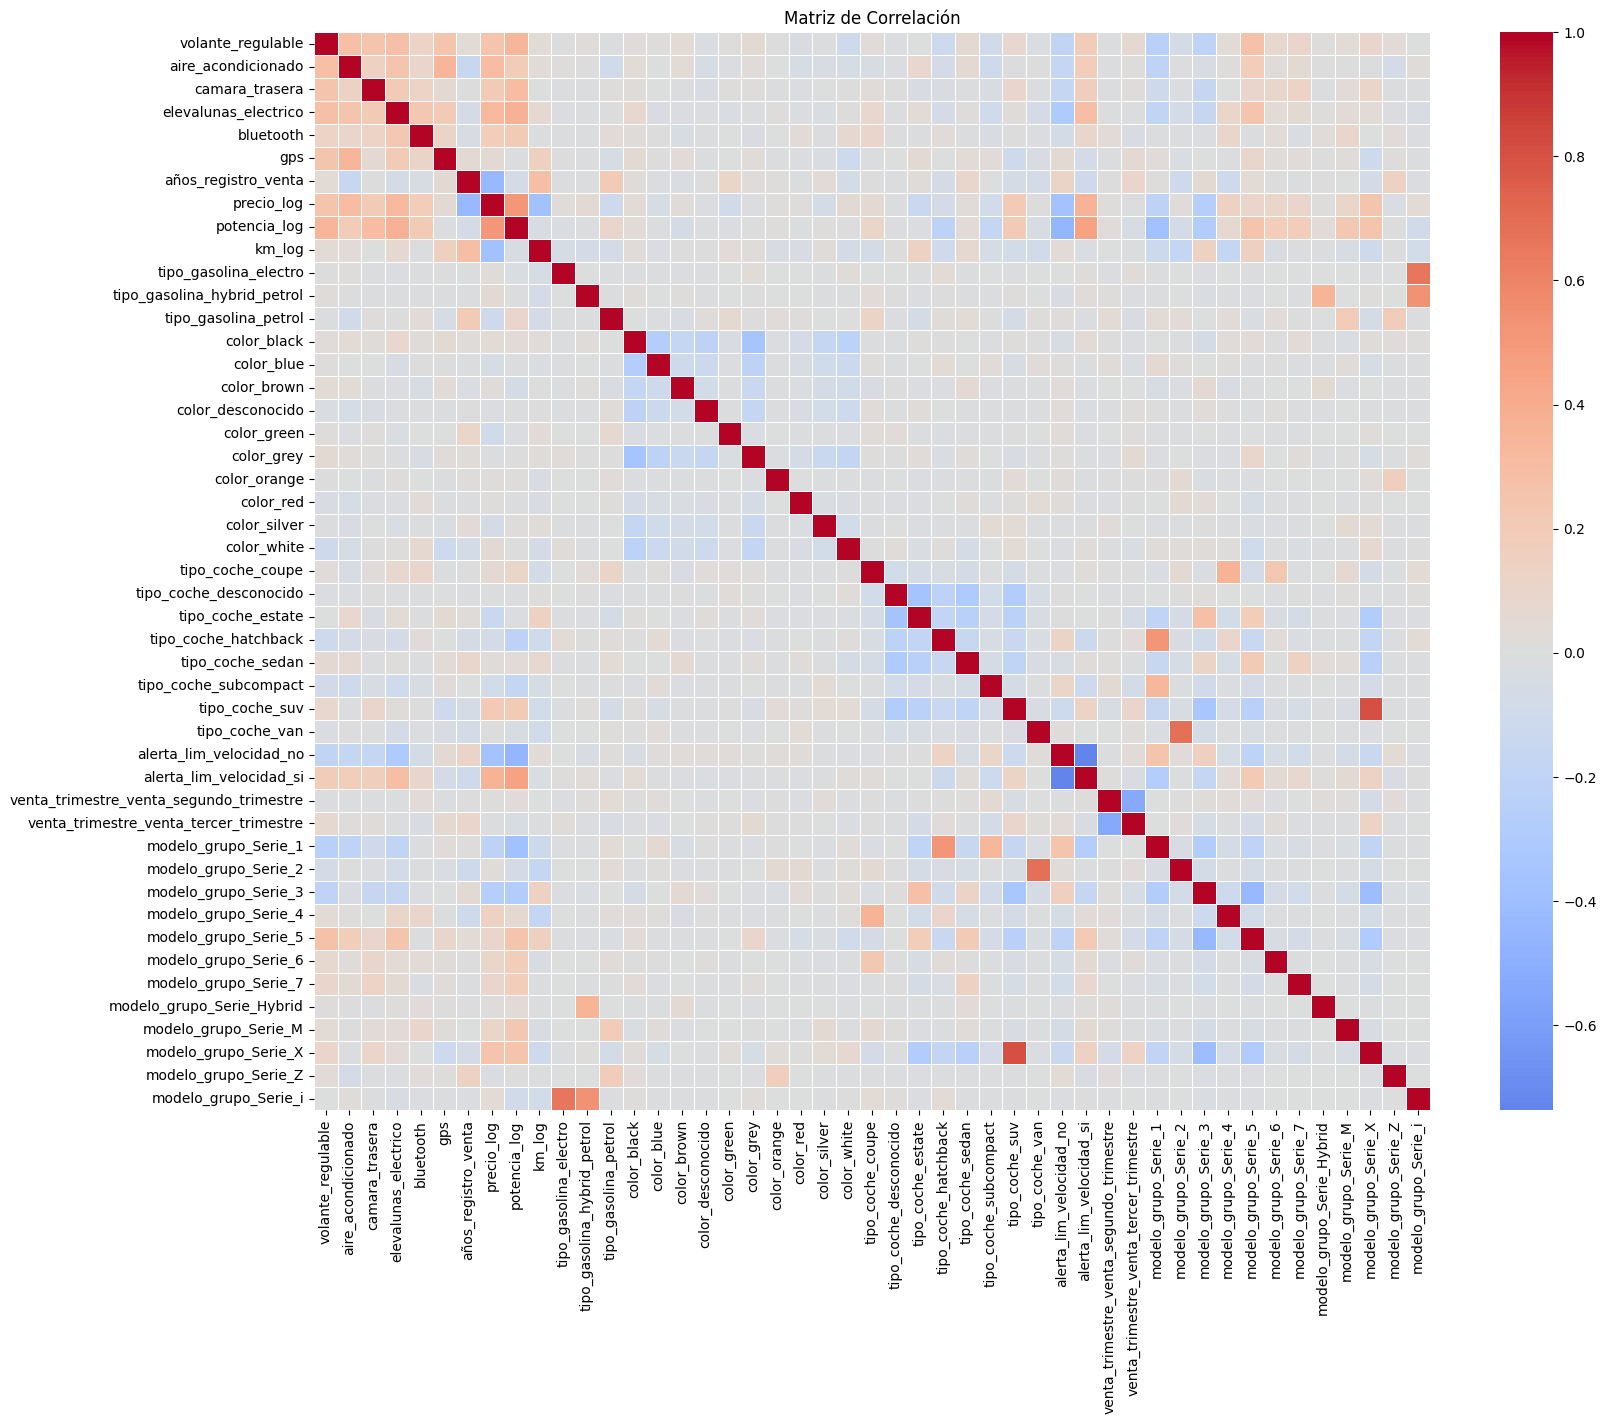

In [712]:
df_corr = df_final.select_dtypes(include=['number'])

corr_matrix = df_corr.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [713]:
# Decidimos quitar la variable modelo_grupo_Serie_X que está muy correlada con tipo_suv
# Decidimos quitar la variable modelo_grupo_Serie_3 que está muy correlada con tipo_van
# Decidimos quitar la variable modelo_grupo_Serie_i que está muy correlada con el tipo gasolina electro

df_final = df_final.drop(columns=['modelo_grupo_Serie_3', 'modelo_grupo_Serie_X', 'modelo_grupo_Serie_i', 'modelo_grupo_Serie_2'])

In [714]:
X = df_final.drop(columns=["precio_log"])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                    feature         VIF
0                         volante_regulable    3.101813
1                        aire_acondicionado    7.304838
2                            camara_trasera    1.458718
3                      elevalunas_electrico    2.562055
4                                 bluetooth    1.433609
5                                       gps   19.065257
6                       años_registro_venta    7.107603
7                              potencia_log   62.073266
8                                    km_log  104.973678
9                     tipo_gasolina_electro    1.011989
10              tipo_gasolina_hybrid_petrol    1.159245
11                     tipo_gasolina_petrol    1.222330
12                              color_black   32.977343
13                               color_blue   14.649120
14                              color_brown    7.352599
15                        color_desconocido   10.405509
16                              color_green    1

Ahora, a pesar de que haya algún valor de VIF bastante elevado, lo dejamos así porque la matriz de correlaciones nos parece adecuada...

In [715]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 0 to 4842
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   volante_regulable                        4836 non-null   int64  
 1   aire_acondicionado                       4836 non-null   int64  
 2   camara_trasera                           4836 non-null   int64  
 3   elevalunas_electrico                     4836 non-null   int64  
 4   bluetooth                                4836 non-null   int64  
 5   gps                                      4836 non-null   int64  
 6   años_registro_venta                      4836 non-null   float64
 7   precio_log                               4836 non-null   float64
 8   potencia_log                             4836 non-null   float64
 9   km_log                                   4836 non-null   float64
 10  tipo_gasolina_electro                    4836 non-nul

# **Paso final: Guardado de los datos finales**

Como último paso, guardamos el dataset final que nos servirá de input para el modelo de predicción posterior.

In [716]:
df_final.to_csv('./data/final/df_final_bmw.csv', index=False)

In [720]:
df_final.head(50).to_excel('./data/final/df_final_bmw_50filas.xlsx', index=False)